# 1. Understanding GAN models basic concepts

## 1.1 Check details of GAN_pytorch.py, understand the whole framework.

### 1) Dataset: What is dataset being used? How can you load this dataset?

MNIST dataset was used

this line to download the dataset if noot found in the director<br>
train_data = datasets.MNIST(root=data_dir, train=True, transform=transform, download=True)<br><br>

this line to load the dataset<br>
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

### 2) Model: Can you plot/draw the basic architecture in this case?

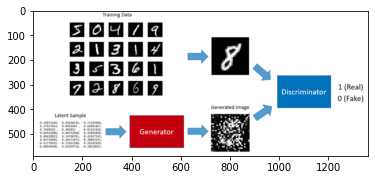

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('architecture.png'))

### 3) Loss: What is loss function in this example?

Binary Cross Entropy Loss function<br>
criterion = nn.BCELoss().to(device)

### 4) Training: How is this network being trained?

GAN training proceeds in alternating periods:<br>

The discriminator trains for one or more epochs.<br>
The generator trains for one or more epochs.<br>
Repeat steps 1 and 2 to continue to train the generator and discriminator networks.<br><br>

We keep the generator constant during the discriminator training phase. As discriminator training tries to figure out how to distinguish real data from fake, it has to learn how to recognize the generator's flaws. That's a different problem for a thoroughly trained generator than it is for an untrained generator that produces random output.<br>

Similarly, we keep the discriminator constant during the generator training phase. Otherwise the generator would be trying to hit a moving target and might never converge.

### 5) Test: How do you test this model?
G learns to make data that is indistiguishable from real data to the discriminator.

## 1.2 

In [36]:
import os
import pickle
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm


In [37]:

class Generator(nn.Module):
    """Image generator
    
    Takes a noise vector as input and syntheses a single channel image accordingly
    """

    def __init__(self, input_dims, output_dims):
        """Init function
        
        Declare the network structure as indicated in CW2 Guidance
        
        Arguments:
            input_dims {int} -- Dimension of input noise vector
            output_dims {int} -- Dimension of the output vector (flatten image)
        """
        super(Generator, self).__init__()
        ###  TODO: Change the architecture and value as CW2 Guidance required
        self.fc0 = nn.Sequential(
            nn.Linear(input_dims, 128), 
            nn.LeakyReLU(0.2))
        
        # output hidden layer
        self.fc1 = nn.Sequential(
            nn.Linear(128, output_dims), 
            nn.Tanh())

    def forward(self, x):
        """Forward function
        
        Arguments:
            x {Tensor} -- a batch of noise vectors in shape (<batch_size>x<input_dims>)
        
        Returns:
            Tensor -- a batch of flatten image in shape (<batch_size>x<output_dims>)
        """
        ###  TODO: modify to be consistent with the network structure
        x = self.fc0(x)
        x = self.fc1(x)
        return x


class Discriminator(nn.Module):
    """Image discriminator
    
    Takes a image as input and predict if it is real from the dataset or fake synthesised by the generator
    """

    def __init__(self, input_dims, output_dims=1):
        """Init function
        
        Declare the discriminator network structure as indicated in CW2 Guidance
        
        Arguments:
            input_dims {int} -- Dimension of the flatten input images
        
        Keyword Arguments:
            output_dims {int} -- Predicted probability (default: {1})
        """
        super(Discriminator, self).__init__()

        ###  TODO: Change the architecture and value as CW2 Guidance required
  
        self.fc0 = nn.Sequential(
            nn.Linear(input_dims, 784),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.fc1 = nn.Sequential(
            nn.Linear(784, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        """Forward function
        
        Arguments:
            x {Tensor} -- a batch of 2D image in shape (<batch_size>xHxW)
        
        Returns:
            Tensor -- predicted probabilities (<batch_size>)
        """
        ###  TODO: modify to be consistent with the network structure

        x = self.fc0(x)
        x = self.fc1(x)
        return x


def show_result(G_net, z_, num_epoch, show=False, save=False, path='result.png'):
    """Result visualisation
    
    Show and save the generated figures in the grid fashion
    
    Arguments:
        G_net {[nn.Module]} -- The generator instant
        z_ {[Tensor]} -- Input noise vectors
        num_epoch {[int]} -- Indicate how many epoch has the generator been trained
    
    Keyword Arguments:
        show {bool} -- If to display the images (default: {False})
        save {bool} -- If to store the images (default: {False})
        path {str} -- path to store the images (default: {'result.png'})
    """

    ###  TODO: complete the rest of part
    # hint: use plt.subplots to construct grid
    # hint: use plt.imshow and plt.savefig to display and store the images
    
    

def show_train_hist(hist, show=False, save=False, path='Train_hist.png'):
    """Loss tracker
    
    Plot the losses of generator and discriminator independently to see the trend
    
    Arguments:
        hist {[dict]} -- Tracking variables
    
    Keyword Arguments:
        show {bool} -- If to display the figure (default: {False})
        save {bool} -- If to store the figure (default: {False})
        path {str} -- path to store the figure (default: {'Train_hist.png'})
    """
    x = range(len(hist['D_losses']))

    y1 = hist['D_losses']
    y2 = hist['G_losses']

    plt.plot(x, y1, label='D_loss')
    plt.plot(x, y2, label='G_loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()

        

def create_noise(num, dim):
    """Noise constructor
    
    returns a tensor filled with random numbers from a standard normal distribution
    
    Arguments:
        num {int} -- Number of vectors
        dim {int} -- Dimension of vectors
    
    Returns:
        [Tensor] -- the generated noise vector batch
    """
    return torch.randn(num, dim)


In [38]:

if __name__ == '__main__':
    # initialise the device for training, if gpu is available, device = 'cuda', else: device = 'cpu'
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    data_dir = './MNIST_data/'
    save_dir = './MNIST_GAN_results/'
    image_save_dir = './MNIST_GAN_results/results'

    # create folder if not exist
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    if not os.path.exists(image_save_dir):
        os.mkdir(image_save_dir)


## Changes here to be made

## 1.2 Change the learning rate to 0.01 and train for a few epochs to understand how learning rate will influence the model outcome.

In [11]:
    # training parameters : change here
    batch_size = 100
    learning_rate = 0.01
    epochs = 100

In [12]:
    # parameters for Models
    image_size = 28
    G_input_dim = 100
    G_output_dim = image_size * image_size
    D_input_dim = image_size * image_size
    D_output_dim = 1
    hidden_size = 32

In [13]:
    # construct the dataset and data loader
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=(0.5,), std=(0.5,))])
    train_data = datasets.MNIST(root=data_dir, train=True, transform=transform, download=True)
    train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

In [15]:
    # declare the generator and discriminator networks    
    G_net = Generator(G_input_dim, G_output_dim).to(device)
    D_net = Discriminator(D_input_dim, D_output_dim).to(device)

    # Binary Cross Entropy Loss function
    criterion = nn.BCELoss().to(device)

    # Initialise the Optimizers
    G_optimizer = torch.optim.Adam(G_net.parameters(), lr=learning_rate)
    D_optimizer = torch.optim.Adam(D_net.parameters(), lr=learning_rate)

    # tracking variables
    train_hist = {}
    train_hist['D_losses'] = []
    train_hist['G_losses'] = []
    train_hist['per_epoch_ptimes'] = []
    train_hist['total_ptime'] = []

    start_time = time.time()
    # training loop
    for epoch in range(epochs):
        G_net.train()
        D_net.train()
        Loss_G = []
        Loss_D = []
        epoch_start_time = time.time()
        for (image, _) in tqdm(train_loader):
            image = image.to(device)
            b_size = len(image)
            # creat real and fake labels
            real_label = torch.ones(b_size, 1).to(device)
            fake_label = torch.zeros(b_size, 1).to(device)

            # generate fake images 
            data_fake = G_net(create_noise(b_size, G_input_dim).to(device))
            data_real = image.view(b_size, D_input_dim)

            # --------train the discriminator network----------
            # compute the loss for real and fake images
            output_real = D_net(data_real)
            output_fake = D_net(data_fake)
            loss_real = criterion(output_real, real_label)
            loss_fake = criterion(output_fake, fake_label)
            loss_d = loss_real + loss_fake

            # back propagation
            D_optimizer.zero_grad()
            loss_d.backward()
            D_optimizer.step()

            # -------- train the generator network-----------
            data_fake = G_net(create_noise(b_size, G_input_dim).to(device))

            # compute the loss for generator network
            output_fake = D_net(data_fake)
            loss_g = criterion(output_fake, real_label)

            ## back propagation
            G_optimizer.zero_grad()
            loss_g.backward()
            G_optimizer.step()

            ## store the loss of each iter
            Loss_D.append(loss_d.item())
            Loss_G.append(loss_g.item())

        epoch_loss_g = np.mean(Loss_G)  # mean generator loss for the epoch
        epoch_loss_d = np.mean(Loss_D)  # mean discriminator loss for the epoch
        epoch_end_time = time.time()
        per_epoch_ptime = epoch_end_time - epoch_start_time

        print("Epoch %d of %d with %.2f s" % (epoch + 1, epochs, per_epoch_ptime))
        print("Generator loss: %.8f, Discriminator loss: %.8f" % (epoch_loss_g, epoch_loss_d))

        path = image_save_dir + '/MNIST_GAN_' + str(epoch + 1) + '.png'
        show_result(G_net, create_noise(25, 100).to(device), (epoch + 1), save=True, path=path)
        
        # record the loss for every epoch
        train_hist['G_losses'].append(epoch_loss_g)
        train_hist['D_losses'].append(epoch_loss_d)
        train_hist['per_epoch_ptimes'].append(per_epoch_ptime)

    end_time = time.time()
    total_ptime = end_time - start_time
    train_hist['total_ptime'].append(total_ptime)

    print('Avg per epoch ptime: %.2f, total %d epochs ptime: %.2f' % ( np.mean(train_hist['per_epoch_ptimes']), epochs, total_ptime))
    print("Training finish!... save training results")
    with open(save_dir + '/train_hist.pkl', 'wb') as f:
        pickle.dump(train_hist, f)
    show_train_hist(train_hist, save=True, path=save_dir + '/MNIST_GAN_train_hist.png')

  1%|          | 4/600 [00:00<00:18, 32.88it/s]

Epoch 1 of 100 with 15.59 s
Generator loss: 49.44838132, Discriminator loss: 2.61332825


  1%|          | 4/600 [00:00<00:17, 33.99it/s]

Epoch 2 of 100 with 17.22 s
Generator loss: 36.78732959, Discriminator loss: 1.14259987


  1%|          | 4/600 [00:00<00:18, 32.61it/s]

Epoch 3 of 100 with 15.57 s
Generator loss: 25.79876659, Discriminator loss: 0.85523267


  1%|          | 4/600 [00:00<00:16, 36.47it/s]

Epoch 4 of 100 with 15.22 s
Generator loss: 15.48470239, Discriminator loss: 0.73890164


  1%|          | 4/600 [00:00<00:16, 35.81it/s]

Epoch 5 of 100 with 15.72 s
Generator loss: 10.16526759, Discriminator loss: 0.41836061


  1%|          | 4/600 [00:00<00:18, 32.09it/s]

Epoch 6 of 100 with 16.62 s
Generator loss: 9.61566729, Discriminator loss: 0.46116875


  1%|          | 4/600 [00:00<00:17, 34.88it/s]

Epoch 7 of 100 with 15.95 s
Generator loss: 9.89425070, Discriminator loss: 0.41295130


  1%|          | 4/600 [00:00<00:18, 32.35it/s]

Epoch 8 of 100 with 14.88 s
Generator loss: 10.69293163, Discriminator loss: 0.55309486


  1%|          | 4/600 [00:00<00:20, 29.28it/s]

Epoch 9 of 100 with 15.09 s
Generator loss: 11.12441737, Discriminator loss: 0.52173982


  1%|          | 4/600 [00:00<00:19, 30.85it/s]

Epoch 10 of 100 with 15.39 s
Generator loss: 11.61427910, Discriminator loss: 0.54386109


  1%|          | 4/600 [00:00<00:16, 35.49it/s]

Epoch 11 of 100 with 15.81 s
Generator loss: 12.67973062, Discriminator loss: 0.46055086


  1%|          | 4/600 [00:00<00:16, 35.81it/s]

Epoch 12 of 100 with 15.11 s
Generator loss: 13.15688706, Discriminator loss: 0.43211399


  1%|          | 4/600 [00:00<00:18, 32.87it/s]

Epoch 13 of 100 with 15.37 s
Generator loss: 14.64272045, Discriminator loss: 0.51773890


  1%|          | 4/600 [00:00<00:19, 30.62it/s]

Epoch 14 of 100 with 15.30 s
Generator loss: 15.47931013, Discriminator loss: 0.72839774


  0%|          | 3/600 [00:00<00:20, 29.49it/s]

Epoch 15 of 100 with 15.04 s
Generator loss: 16.18791856, Discriminator loss: 0.43177480


  0%|          | 3/600 [00:00<00:24, 24.06it/s]

Epoch 16 of 100 with 15.86 s
Generator loss: 18.26256604, Discriminator loss: 0.82798486


  0%|          | 3/600 [00:00<00:26, 22.12it/s]

Epoch 17 of 100 with 15.70 s
Generator loss: 18.37277887, Discriminator loss: 0.52364748


  0%|          | 3/600 [00:00<00:21, 27.85it/s]

Epoch 18 of 100 with 17.10 s
Generator loss: 19.73619310, Discriminator loss: 0.66378098


  0%|          | 3/600 [00:00<00:22, 26.39it/s]

Epoch 19 of 100 with 16.07 s
Generator loss: 20.69703723, Discriminator loss: 0.65964862


  1%|          | 4/600 [00:00<00:19, 30.85it/s]

Epoch 20 of 100 with 15.58 s
Generator loss: 22.41699883, Discriminator loss: 0.60639116


  0%|          | 3/600 [00:00<00:20, 28.92it/s]

Epoch 21 of 100 with 15.45 s
Generator loss: 24.52575416, Discriminator loss: 0.95808097


  0%|          | 3/600 [00:00<00:21, 27.60it/s]

Epoch 22 of 100 with 15.12 s
Generator loss: 26.26979814, Discriminator loss: 0.66838286


  0%|          | 3/600 [00:00<00:20, 28.92it/s]

Epoch 23 of 100 with 15.07 s
Generator loss: 29.07342388, Discriminator loss: 1.02426329


  1%|          | 4/600 [00:00<00:18, 32.34it/s]

Epoch 24 of 100 with 15.27 s
Generator loss: 30.32005264, Discriminator loss: 0.76322685


  1%|          | 4/600 [00:00<00:17, 34.58it/s]

Epoch 25 of 100 with 15.36 s
Generator loss: 33.25653907, Discriminator loss: 1.07376970


  0%|          | 3/600 [00:00<00:24, 24.66it/s]

Epoch 26 of 100 with 17.11 s
Generator loss: 37.27253538, Discriminator loss: 1.03818595


  1%|          | 4/600 [00:00<00:17, 33.42it/s]

Epoch 27 of 100 with 16.44 s
Generator loss: 40.65901443, Discriminator loss: 0.88685443


  1%|          | 4/600 [00:00<00:17, 33.42it/s]

Epoch 28 of 100 with 15.42 s
Generator loss: 47.42019278, Discriminator loss: 2.11025598


  1%|          | 4/600 [00:00<00:17, 34.58it/s]

Epoch 29 of 100 with 14.79 s
Generator loss: 54.93276506, Discriminator loss: 1.80984036


  1%|          | 4/600 [00:00<00:16, 35.49it/s]

Epoch 30 of 100 with 15.31 s
Generator loss: 62.58311432, Discriminator loss: 2.46411768


  0%|          | 3/600 [00:00<00:22, 27.10it/s]

Epoch 31 of 100 with 15.06 s
Generator loss: 70.67522551, Discriminator loss: 3.99705910


  1%|          | 4/600 [00:00<00:17, 33.15it/s]

Epoch 32 of 100 with 15.45 s
Generator loss: 76.81738613, Discriminator loss: 2.89212736


  1%|          | 4/600 [00:00<00:18, 32.61it/s]

Epoch 33 of 100 with 15.26 s
Generator loss: 78.71529478, Discriminator loss: 6.32839345


  1%|          | 4/600 [00:00<00:19, 31.10it/s]

Epoch 34 of 100 with 15.24 s
Generator loss: 82.71328237, Discriminator loss: 7.86325862


  1%|          | 4/600 [00:00<00:19, 30.62it/s]

Epoch 35 of 100 with 15.51 s
Generator loss: 82.52320032, Discriminator loss: 12.41418649


  1%|          | 4/600 [00:00<00:17, 33.98it/s]

Epoch 36 of 100 with 15.24 s
Generator loss: 84.60817419, Discriminator loss: 14.14852086


  1%|          | 4/600 [00:00<00:17, 33.42it/s]

Epoch 37 of 100 with 15.23 s
Generator loss: 85.88495211, Discriminator loss: 15.13031260


  1%|          | 4/600 [00:00<00:18, 32.34it/s]

Epoch 38 of 100 with 15.55 s
Generator loss: 59.39809765, Discriminator loss: 43.70543728


 76%|███████▌  | 454/600 [00:11<00:03, 38.75it/s]


KeyboardInterrupt: 

As we incresed the lr rate we noticed that generator loss remained high after a little drop and did not go down to the desired region of around 2<br>
what happend can indicate to a mode collapse and the training failed                                                                                                                                 


## 1.3 Change the batch size to 256, and discuss how the batch size influence the model performance regarding its training speed and test accuracy.

In [8]:
    # training parameters : change here
    batch_size = 256
    learning_rate = 0.0002
    epochs = 100

In [9]:
    # parameters for Models
    image_size = 28
    G_input_dim = 100
    G_output_dim = image_size * image_size
    D_input_dim = image_size * image_size
    D_output_dim = 1
    hidden_size = 32

In [10]:
    # construct the dataset and data loader
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=(0.5,), std=(0.5,))])
    train_data = datasets.MNIST(root=data_dir, train=True, transform=transform, download=True)
    train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

In [11]:
    # declare the generator and discriminator networks    
    G_net = Generator(G_input_dim, G_output_dim).to(device)
    D_net = Discriminator(D_input_dim, D_output_dim).to(device)

    # Binary Cross Entropy Loss function
    criterion = nn.BCELoss().to(device)

    # Initialise the Optimizers
    G_optimizer = torch.optim.Adam(G_net.parameters(), lr=learning_rate)
    D_optimizer = torch.optim.Adam(D_net.parameters(), lr=learning_rate)

    # tracking variables
    train_hist = {}
    train_hist['D_losses'] = []
    train_hist['G_losses'] = []
    train_hist['per_epoch_ptimes'] = []
    train_hist['total_ptime'] = []

    start_time = time.time()
    # training loop
    for epoch in range(epochs):
        G_net.train()
        D_net.train()
        Loss_G = []
        Loss_D = []
        epoch_start_time = time.time()
        for (image, _) in tqdm(train_loader):
            image = image.to(device)
            b_size = len(image)
            # creat real and fake labels
            real_label = torch.ones(b_size, 1).to(device)
            fake_label = torch.zeros(b_size, 1).to(device)

            # generate fake images 
            data_fake = G_net(create_noise(b_size, G_input_dim).to(device))
            data_real = image.view(b_size, D_input_dim)

            # --------train the discriminator network----------
            # compute the loss for real and fake images
            output_real = D_net(data_real)
            output_fake = D_net(data_fake)
            loss_real = criterion(output_real, real_label)
            loss_fake = criterion(output_fake, fake_label)
            loss_d = loss_real + loss_fake

            # back propagation
            D_optimizer.zero_grad()
            loss_d.backward()
            D_optimizer.step()

            # -------- train the generator network-----------
            data_fake = G_net(create_noise(b_size, G_input_dim).to(device))

            # compute the loss for generator network
            output_fake = D_net(data_fake)
            loss_g = criterion(output_fake, real_label)

            ## back propagation
            G_optimizer.zero_grad()
            loss_g.backward()
            G_optimizer.step()

            ## store the loss of each iter
            Loss_D.append(loss_d.item())
            Loss_G.append(loss_g.item())

        epoch_loss_g = np.mean(Loss_G)  # mean generator loss for the epoch
        epoch_loss_d = np.mean(Loss_D)  # mean discriminator loss for the epoch
        epoch_end_time = time.time()
        per_epoch_ptime = epoch_end_time - epoch_start_time

        print("Epoch %d of %d with %.2f s" % (epoch + 1, epochs, per_epoch_ptime))
        print("Generator loss: %.8f, Discriminator loss: %.8f" % (epoch_loss_g, epoch_loss_d))

        path = image_save_dir + '/MNIST_GAN_' + str(epoch + 1) + '.png'
        show_result(G_net, create_noise(25, 100).to(device), (epoch + 1), save=True, path=path)
        
        # record the loss for every epoch
        train_hist['G_losses'].append(epoch_loss_g)
        train_hist['D_losses'].append(epoch_loss_d)
        train_hist['per_epoch_ptimes'].append(per_epoch_ptime)

    end_time = time.time()
    total_ptime = end_time - start_time
    train_hist['total_ptime'].append(total_ptime)

    print('Avg per epoch ptime: %.2f, total %d epochs ptime: %.2f' % ( np.mean(train_hist['per_epoch_ptimes']), epochs, total_ptime))
    print("Training finish!... save training results")
    with open(save_dir + '/train_hist.pkl', 'wb') as f:
        pickle.dump(train_hist, f)
    show_train_hist(train_hist, save=True, path=save_dir + '/MNIST_GAN_train_hist.png')

  1%|          | 2/235 [00:00<00:14, 15.55it/s]

Epoch 1 of 100 with 17.81 s
Generator loss: 1.40148676, Discriminator loss: 0.50064124


  1%|          | 2/235 [00:00<00:14, 16.05it/s]

Epoch 2 of 100 with 11.39 s
Generator loss: 1.87582271, Discriminator loss: 0.31409363


  1%|          | 2/235 [00:00<00:14, 15.67it/s]

Epoch 3 of 100 with 11.35 s
Generator loss: 2.02407970, Discriminator loss: 0.31763845


  1%|          | 2/235 [00:00<00:15, 14.64it/s]

Epoch 4 of 100 with 11.56 s
Generator loss: 2.04377747, Discriminator loss: 0.31612543


  1%|          | 2/235 [00:00<00:14, 15.55it/s]

Epoch 5 of 100 with 11.66 s
Generator loss: 2.85315799, Discriminator loss: 0.17890541


  1%|          | 2/235 [00:00<00:14, 15.67it/s]

Epoch 6 of 100 with 11.55 s
Generator loss: 2.30304086, Discriminator loss: 0.35307954


  1%|          | 2/235 [00:00<00:15, 15.31it/s]

Epoch 7 of 100 with 12.12 s
Generator loss: 2.60651410, Discriminator loss: 0.30987314


  1%|          | 2/235 [00:00<00:16, 14.12it/s]

Epoch 8 of 100 with 11.94 s
Generator loss: 3.17091832, Discriminator loss: 0.18739589


  1%|          | 2/235 [00:00<00:14, 16.58it/s]

Epoch 9 of 100 with 11.84 s
Generator loss: 3.17494484, Discriminator loss: 0.17753396


  1%|          | 2/235 [00:00<00:15, 15.31it/s]

Epoch 10 of 100 with 11.97 s
Generator loss: 3.30736750, Discriminator loss: 0.18158996


  1%|          | 2/235 [00:00<00:14, 16.44it/s]

Epoch 11 of 100 with 11.94 s
Generator loss: 3.35636037, Discriminator loss: 0.21136789


  1%|          | 2/235 [00:00<00:18, 12.46it/s]

Epoch 12 of 100 with 11.96 s
Generator loss: 2.85338108, Discriminator loss: 0.32490255


  1%|          | 2/235 [00:00<00:16, 14.32it/s]

Epoch 13 of 100 with 13.37 s
Generator loss: 2.58704962, Discriminator loss: 0.38234997


  1%|          | 2/235 [00:00<00:12, 18.91it/s]

Epoch 14 of 100 with 11.67 s
Generator loss: 2.67263524, Discriminator loss: 0.37737722


  1%|          | 2/235 [00:00<00:16, 14.43it/s]

Epoch 15 of 100 with 11.54 s
Generator loss: 2.56447546, Discriminator loss: 0.43780653


  1%|          | 2/235 [00:00<00:15, 15.43it/s]

Epoch 16 of 100 with 11.84 s
Generator loss: 2.54319787, Discriminator loss: 0.43580857


  1%|          | 2/235 [00:00<00:13, 16.85it/s]

Epoch 17 of 100 with 11.73 s
Generator loss: 2.58739851, Discriminator loss: 0.40654923


  2%|▏         | 4/235 [00:00<00:12, 19.19it/s]

Epoch 18 of 100 with 11.41 s
Generator loss: 2.81661414, Discriminator loss: 0.33818016


  1%|          | 2/235 [00:00<00:11, 19.66it/s]

Epoch 19 of 100 with 11.45 s
Generator loss: 2.84045285, Discriminator loss: 0.35099498


  1%|          | 2/235 [00:00<00:14, 16.04it/s]

Epoch 20 of 100 with 11.34 s
Generator loss: 2.88440024, Discriminator loss: 0.39201596


  1%|          | 2/235 [00:00<00:13, 16.71it/s]

Epoch 21 of 100 with 11.34 s
Generator loss: 2.86791952, Discriminator loss: 0.43309000


  1%|          | 2/235 [00:00<00:13, 17.75it/s]

Epoch 22 of 100 with 11.50 s
Generator loss: 2.87401945, Discriminator loss: 0.45447309


  1%|          | 2/235 [00:00<00:14, 15.79it/s]

Epoch 23 of 100 with 11.54 s
Generator loss: 2.82234864, Discriminator loss: 0.45975943


  1%|          | 2/235 [00:00<00:13, 17.15it/s]

Epoch 24 of 100 with 11.46 s
Generator loss: 2.89898346, Discriminator loss: 0.44422480


  1%|          | 2/235 [00:00<00:13, 16.85it/s]

Epoch 25 of 100 with 11.90 s
Generator loss: 2.90408164, Discriminator loss: 0.45135186


  1%|          | 2/235 [00:00<00:14, 16.17it/s]

Epoch 26 of 100 with 12.06 s
Generator loss: 2.84256404, Discriminator loss: 0.48407511


  1%|          | 2/235 [00:00<00:14, 15.79it/s]

Epoch 27 of 100 with 11.97 s
Generator loss: 2.76997532, Discriminator loss: 0.51574192


  1%|          | 2/235 [00:00<00:15, 15.43it/s]

Epoch 28 of 100 with 12.03 s
Generator loss: 2.76403687, Discriminator loss: 0.51273022


  1%|          | 2/235 [00:00<00:14, 16.05it/s]

Epoch 29 of 100 with 11.78 s
Generator loss: 2.73362017, Discriminator loss: 0.52057978


  1%|          | 2/235 [00:00<00:15, 15.43it/s]

Epoch 30 of 100 with 12.27 s
Generator loss: 2.79722432, Discriminator loss: 0.47840317


  1%|          | 2/235 [00:00<00:14, 16.30it/s]

Epoch 31 of 100 with 12.21 s
Generator loss: 2.82714568, Discriminator loss: 0.45899082


  1%|          | 2/235 [00:00<00:13, 17.14it/s]

Epoch 32 of 100 with 11.85 s
Generator loss: 2.85106627, Discriminator loss: 0.44729943


  1%|          | 2/235 [00:00<00:14, 15.67it/s]

Epoch 33 of 100 with 11.69 s
Generator loss: 2.97503021, Discriminator loss: 0.42371504


  1%|          | 2/235 [00:00<00:15, 15.31it/s]

Epoch 34 of 100 with 11.77 s
Generator loss: 2.98258045, Discriminator loss: 0.44021986


  1%|          | 2/235 [00:00<00:15, 15.31it/s]

Epoch 35 of 100 with 11.68 s
Generator loss: 2.98867423, Discriminator loss: 0.44780343


  1%|          | 2/235 [00:00<00:14, 15.67it/s]

Epoch 36 of 100 with 11.56 s
Generator loss: 2.94156775, Discriminator loss: 0.46674359


  1%|          | 2/235 [00:00<00:13, 16.99it/s]

Epoch 37 of 100 with 11.65 s
Generator loss: 3.01069501, Discriminator loss: 0.45876179


  1%|          | 2/235 [00:00<00:15, 15.31it/s]

Epoch 38 of 100 with 11.74 s
Generator loss: 3.09262218, Discriminator loss: 0.45741810


  1%|          | 2/235 [00:00<00:13, 17.59it/s]

Epoch 39 of 100 with 12.28 s
Generator loss: 3.02634546, Discriminator loss: 0.45778319


  1%|          | 2/235 [00:00<00:13, 16.85it/s]

Epoch 40 of 100 with 11.79 s
Generator loss: 2.98820997, Discriminator loss: 0.46971528


  1%|          | 2/235 [00:00<00:13, 17.14it/s]

Epoch 41 of 100 with 12.34 s
Generator loss: 3.03555270, Discriminator loss: 0.45606118


  1%|          | 2/235 [00:00<00:16, 14.02it/s]

Epoch 42 of 100 with 12.45 s
Generator loss: 3.13949756, Discriminator loss: 0.41244705


  1%|          | 2/235 [00:00<00:13, 16.99it/s]

Epoch 43 of 100 with 11.98 s
Generator loss: 3.16971694, Discriminator loss: 0.40918247


  1%|          | 2/235 [00:00<00:13, 17.14it/s]

Epoch 44 of 100 with 11.52 s
Generator loss: 3.17118835, Discriminator loss: 0.40249643


  1%|          | 2/235 [00:00<00:16, 14.12it/s]

Epoch 45 of 100 with 11.95 s
Generator loss: 3.35701889, Discriminator loss: 0.37052121


  1%|          | 2/235 [00:00<00:13, 17.44it/s]

Epoch 46 of 100 with 11.89 s
Generator loss: 3.56590953, Discriminator loss: 0.33483509


  1%|          | 2/235 [00:00<00:14, 15.92it/s]

Epoch 47 of 100 with 11.69 s
Generator loss: 3.70640927, Discriminator loss: 0.32980143


  1%|          | 2/235 [00:00<00:13, 17.29it/s]

Epoch 48 of 100 with 11.53 s
Generator loss: 3.92819329, Discriminator loss: 0.30638654


  1%|          | 2/235 [00:00<00:14, 15.55it/s]

Epoch 49 of 100 with 11.63 s
Generator loss: 3.93676549, Discriminator loss: 0.30221260


  1%|          | 2/235 [00:00<00:15, 14.97it/s]

Epoch 50 of 100 with 11.72 s
Generator loss: 4.07773673, Discriminator loss: 0.30296677


  1%|          | 2/235 [00:00<00:14, 15.67it/s]

Epoch 51 of 100 with 11.66 s
Generator loss: 4.18511894, Discriminator loss: 0.28994813


  1%|          | 2/235 [00:00<00:16, 14.32it/s]

Epoch 52 of 100 with 12.11 s
Generator loss: 4.31119123, Discriminator loss: 0.29330229


  1%|          | 2/235 [00:00<00:13, 16.99it/s]

Epoch 53 of 100 with 12.05 s
Generator loss: 4.46882768, Discriminator loss: 0.27583926


  1%|          | 2/235 [00:00<00:14, 15.92it/s]

Epoch 54 of 100 with 11.71 s
Generator loss: 4.91240519, Discriminator loss: 0.24696004


  1%|          | 2/235 [00:00<00:16, 14.03it/s]

Epoch 55 of 100 with 11.86 s
Generator loss: 4.90726029, Discriminator loss: 0.22661991


  1%|          | 2/235 [00:00<00:13, 16.85it/s]

Epoch 56 of 100 with 11.73 s
Generator loss: 4.46733168, Discriminator loss: 0.26744510


  1%|          | 2/235 [00:00<00:13, 17.29it/s]

Epoch 57 of 100 with 11.64 s
Generator loss: 4.31414421, Discriminator loss: 0.28054692


  1%|          | 2/235 [00:00<00:15, 14.97it/s]

Epoch 58 of 100 with 11.67 s
Generator loss: 3.85920350, Discriminator loss: 0.34013357


  1%|          | 2/235 [00:00<00:14, 15.79it/s]

Epoch 59 of 100 with 11.61 s
Generator loss: 4.09545928, Discriminator loss: 0.31107286


  1%|          | 2/235 [00:00<00:14, 16.57it/s]

Epoch 60 of 100 with 11.69 s
Generator loss: 4.23956555, Discriminator loss: 0.29069930


  1%|          | 2/235 [00:00<00:14, 16.57it/s]

Epoch 61 of 100 with 11.91 s
Generator loss: 4.10950629, Discriminator loss: 0.30298620


  1%|          | 2/235 [00:00<00:13, 17.59it/s]

Epoch 62 of 100 with 11.70 s
Generator loss: 3.67010104, Discriminator loss: 0.37754109


  1%|          | 2/235 [00:00<00:14, 15.55it/s]

Epoch 63 of 100 with 11.58 s
Generator loss: 3.57727113, Discriminator loss: 0.39292034


  1%|          | 2/235 [00:00<00:14, 15.67it/s]

Epoch 64 of 100 with 12.30 s
Generator loss: 3.47916627, Discriminator loss: 0.41790442


  1%|          | 2/235 [00:00<00:13, 16.99it/s]

Epoch 65 of 100 with 11.97 s
Generator loss: 3.56331758, Discriminator loss: 0.39927773


  1%|          | 2/235 [00:00<00:14, 16.04it/s]

Epoch 66 of 100 with 11.63 s
Generator loss: 3.47207933, Discriminator loss: 0.40899244


  1%|          | 2/235 [00:00<00:12, 18.07it/s]

Epoch 67 of 100 with 11.53 s
Generator loss: 3.40937015, Discriminator loss: 0.42878798


  1%|          | 2/235 [00:00<00:15, 15.31it/s]

Epoch 68 of 100 with 11.64 s
Generator loss: 3.33761322, Discriminator loss: 0.45348018


  1%|          | 2/235 [00:00<00:14, 16.57it/s]

Epoch 69 of 100 with 11.73 s
Generator loss: 3.28993166, Discriminator loss: 0.46199679


  1%|          | 2/235 [00:00<00:13, 16.85it/s]

Epoch 70 of 100 with 11.54 s
Generator loss: 3.19207792, Discriminator loss: 0.48452853


  1%|          | 2/235 [00:00<00:16, 14.32it/s]

Epoch 71 of 100 with 11.96 s
Generator loss: 3.13246359, Discriminator loss: 0.48447961


  1%|          | 2/235 [00:00<00:15, 14.75it/s]

Epoch 72 of 100 with 13.79 s
Generator loss: 3.10220812, Discriminator loss: 0.49579802


  1%|          | 2/235 [00:00<00:13, 17.14it/s]

Epoch 73 of 100 with 12.93 s
Generator loss: 3.15351281, Discriminator loss: 0.49149471


  1%|          | 2/235 [00:00<00:14, 16.44it/s]

Epoch 74 of 100 with 12.20 s
Generator loss: 3.09149251, Discriminator loss: 0.49720109


  1%|          | 2/235 [00:00<00:16, 14.32it/s]

Epoch 75 of 100 with 11.80 s
Generator loss: 3.09850357, Discriminator loss: 0.49935927


  1%|          | 2/235 [00:00<00:13, 17.59it/s]

Epoch 76 of 100 with 11.59 s
Generator loss: 3.04878824, Discriminator loss: 0.51719398


  1%|          | 2/235 [00:00<00:15, 15.19it/s]

Epoch 77 of 100 with 12.03 s
Generator loss: 3.01184456, Discriminator loss: 0.52788234


  1%|          | 2/235 [00:00<00:15, 15.31it/s]

Epoch 78 of 100 with 12.21 s
Generator loss: 2.96860743, Discriminator loss: 0.53814584


  1%|          | 2/235 [00:00<00:13, 17.44it/s]

Epoch 79 of 100 with 12.06 s
Generator loss: 2.99445818, Discriminator loss: 0.53407255


  1%|          | 2/235 [00:00<00:16, 13.83it/s]

Epoch 80 of 100 with 12.25 s
Generator loss: 3.01170070, Discriminator loss: 0.51955939


  1%|          | 2/235 [00:00<00:14, 16.57it/s]

Epoch 81 of 100 with 12.37 s
Generator loss: 3.00814951, Discriminator loss: 0.52436057


  1%|          | 2/235 [00:00<00:15, 14.85it/s]

Epoch 82 of 100 with 11.64 s
Generator loss: 2.94493094, Discriminator loss: 0.53115171


  1%|          | 2/235 [00:00<00:15, 15.42it/s]

Epoch 83 of 100 with 11.58 s
Generator loss: 2.91299339, Discriminator loss: 0.53457758


  1%|          | 2/235 [00:00<00:16, 14.53it/s]

Epoch 84 of 100 with 11.70 s
Generator loss: 2.94535371, Discriminator loss: 0.54361362


  1%|          | 2/235 [00:00<00:13, 16.99it/s]

Epoch 85 of 100 with 11.67 s
Generator loss: 2.97012203, Discriminator loss: 0.53244022


  1%|          | 2/235 [00:00<00:16, 14.43it/s]

Epoch 86 of 100 with 11.63 s
Generator loss: 2.99074587, Discriminator loss: 0.53752003


  1%|          | 2/235 [00:00<00:13, 16.85it/s]

Epoch 87 of 100 with 11.60 s
Generator loss: 2.97813732, Discriminator loss: 0.53777823


  1%|          | 2/235 [00:00<00:15, 14.97it/s]

Epoch 88 of 100 with 11.62 s
Generator loss: 2.98397684, Discriminator loss: 0.54187460


  1%|          | 2/235 [00:00<00:13, 16.71it/s]

Epoch 89 of 100 with 11.66 s
Generator loss: 2.99208117, Discriminator loss: 0.53096203


  1%|          | 2/235 [00:00<00:14, 15.67it/s]

Epoch 90 of 100 with 11.47 s
Generator loss: 2.99530081, Discriminator loss: 0.54044224


  1%|          | 2/235 [00:00<00:16, 14.12it/s]

Epoch 91 of 100 with 11.68 s
Generator loss: 3.00570541, Discriminator loss: 0.52114667


  1%|          | 2/235 [00:00<00:15, 15.43it/s]

Epoch 92 of 100 with 11.70 s
Generator loss: 3.11325103, Discriminator loss: 0.50734981


  1%|          | 2/235 [00:00<00:14, 16.44it/s]

Epoch 93 of 100 with 11.63 s
Generator loss: 3.19788419, Discriminator loss: 0.48700821


  1%|          | 2/235 [00:00<00:14, 15.79it/s]

Epoch 94 of 100 with 11.54 s
Generator loss: 3.35008831, Discriminator loss: 0.45988527


  1%|          | 2/235 [00:00<00:14, 15.67it/s]

Epoch 95 of 100 with 11.74 s
Generator loss: 3.61296836, Discriminator loss: 0.40432065


  1%|          | 2/235 [00:00<00:13, 17.29it/s]

Epoch 96 of 100 with 11.68 s
Generator loss: 3.81655183, Discriminator loss: 0.37639510


  1%|          | 2/235 [00:00<00:13, 17.29it/s]

Epoch 97 of 100 with 11.67 s
Generator loss: 3.71370300, Discriminator loss: 0.39206440


  1%|          | 2/235 [00:00<00:15, 14.85it/s]

Epoch 98 of 100 with 11.61 s
Generator loss: 4.32241482, Discriminator loss: 0.30499354


  1%|          | 2/235 [00:00<00:14, 15.79it/s]

Epoch 99 of 100 with 11.95 s
Generator loss: 4.64915922, Discriminator loss: 0.29642977


100%|██████████| 235/235 [00:11<00:00, 19.98it/s]


Epoch 100 of 100 with 11.77 s
Generator loss: 4.26724079, Discriminator loss: 0.31469316
Avg per epoch ptime: 11.88, total 100 epochs ptime: 1188.26
Training finish!... save training results


Using batches size of 256, we reaches equivalent loss_g and almost the equivalent for loss_d
after the same number of training epochs, leading to greater parallelism and shorter training times.

## 1.4 Change the training epoch to 200, run it.

In [5]:
    # training parameters : change here
    batch_size = 100
    learning_rate = 0.0002
    epochs = 200

In [6]:
    # parameters for Models
    image_size = 28
    G_input_dim = 100
    G_output_dim = image_size * image_size
    D_input_dim = image_size * image_size
    D_output_dim = 1
    hidden_size = 32

In [7]:
    # construct the dataset and data loader
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=(0.5,), std=(0.5,))])
    train_data = datasets.MNIST(root=data_dir, train=True, transform=transform, download=True)
    train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

In [ ]:
    # declare the generator and discriminator networks    
    G_net = Generator(G_input_dim, G_output_dim).to(device)
    D_net = Discriminator(D_input_dim, D_output_dim).to(device)

    # Binary Cross Entropy Loss function
    criterion = nn.BCELoss().to(device)

    # Initialise the Optimizers
    G_optimizer = torch.optim.Adam(G_net.parameters(), lr=learning_rate)
    D_optimizer = torch.optim.Adam(D_net.parameters(), lr=learning_rate)

    # tracking variables
    train_hist = {}
    train_hist['D_losses'] = []
    train_hist['G_losses'] = []
    train_hist['per_epoch_ptimes'] = []
    train_hist['total_ptime'] = []

    start_time = time.time()
    # training loop
    for epoch in range(epochs):
        G_net.train()
        D_net.train()
        Loss_G = []
        Loss_D = []
        epoch_start_time = time.time()
        for (image, _) in tqdm(train_loader):
            image = image.to(device)
            b_size = len(image)
            # creat real and fake labels
            real_label = torch.ones(b_size, 1).to(device)
            fake_label = torch.zeros(b_size, 1).to(device)

            # generate fake images 
            data_fake = G_net(create_noise(b_size, G_input_dim).to(device))
            data_real = image.view(b_size, D_input_dim)

            # --------train the discriminator network----------
            # compute the loss for real and fake images
            output_real = D_net(data_real)
            output_fake = D_net(data_fake)
            loss_real = criterion(output_real, real_label)
            loss_fake = criterion(output_fake, fake_label)
            loss_d = loss_real + loss_fake

            # back propagation
            D_optimizer.zero_grad()
            loss_d.backward()
            D_optimizer.step()

            # -------- train the generator network-----------
            data_fake = G_net(create_noise(b_size, G_input_dim).to(device))

            # compute the loss for generator network
            output_fake = D_net(data_fake)
            loss_g = criterion(output_fake, real_label)

            ## back propagation
            G_optimizer.zero_grad()
            loss_g.backward()
            G_optimizer.step()

            ## store the loss of each iter
            Loss_D.append(loss_d.item())
            Loss_G.append(loss_g.item())

        epoch_loss_g = np.mean(Loss_G)  # mean generator loss for the epoch
        epoch_loss_d = np.mean(Loss_D)  # mean discriminator loss for the epoch
        epoch_end_time = time.time()
        per_epoch_ptime = epoch_end_time - epoch_start_time

        print("Epoch %d of %d with %.2f s" % (epoch + 1, epochs, per_epoch_ptime))
        print("Generator loss: %.8f, Discriminator loss: %.8f" % (epoch_loss_g, epoch_loss_d))

        path = image_save_dir + '/MNIST_GAN_' + str(epoch + 1) + '.png'
        show_result(G_net, create_noise(25, 100).to(device), (epoch + 1), save=True, path=path)
        
        # record the loss for every epoch
        train_hist['G_losses'].append(epoch_loss_g)
        train_hist['D_losses'].append(epoch_loss_d)
        train_hist['per_epoch_ptimes'].append(per_epoch_ptime)

    end_time = time.time()
    total_ptime = end_time - start_time
    train_hist['total_ptime'].append(total_ptime)

    print('Avg per epoch ptime: %.2f, total %d epochs ptime: %.2f' % ( np.mean(train_hist['per_epoch_ptimes']), epochs, total_ptime))
    print("Training finish!... save training results")
    with open(save_dir + '/train_hist.pkl', 'wb') as f:
        pickle.dump(train_hist, f)
    show_train_hist(train_hist, save=True, path=save_dir + '/MNIST_GAN_train_hist.png')

  0%|          | 3/600 [00:00<00:22, 27.10it/s]

Epoch 1 of 200 with 21.68 s
Generator loss: 1.63800164, Discriminator loss: 0.42636867


  1%|          | 4/600 [00:00<00:17, 33.70it/s]

Epoch 2 of 200 with 15.02 s
Generator loss: 2.15286125, Discriminator loss: 0.32615032


  1%|          | 4/600 [00:00<00:15, 38.19it/s]

Epoch 3 of 200 with 15.08 s
Generator loss: 2.27621115, Discriminator loss: 0.36656246


  0%|          | 3/600 [00:00<00:25, 23.14it/s]

Epoch 4 of 200 with 15.78 s
Generator loss: 3.03340017, Discriminator loss: 0.22350515


  1%|          | 4/600 [00:00<00:19, 29.93it/s]

Epoch 5 of 200 with 15.31 s
Generator loss: 2.77222238, Discriminator loss: 0.33047190


  1%|          | 4/600 [00:00<00:17, 33.42it/s]

Epoch 6 of 200 with 14.74 s
Generator loss: 2.44415909, Discriminator loss: 0.43212996


  1%|          | 4/600 [00:00<00:17, 34.28it/s]

Epoch 7 of 200 with 14.70 s
Generator loss: 2.40764173, Discriminator loss: 0.44253411


  1%|          | 4/600 [00:00<00:15, 38.20it/s]

Epoch 8 of 200 with 14.95 s
Generator loss: 2.41174331, Discriminator loss: 0.48933008


  1%|          | 4/600 [00:00<00:16, 37.13it/s]

Epoch 9 of 200 with 14.70 s
Generator loss: 2.49785081, Discriminator loss: 0.51469001


  1%|          | 4/600 [00:00<00:15, 38.56it/s]

Epoch 10 of 200 with 14.64 s
Generator loss: 2.46047556, Discriminator loss: 0.55597989


  1%|          | 4/600 [00:00<00:18, 32.87it/s]

Epoch 11 of 200 with 14.22 s
Generator loss: 2.54919626, Discriminator loss: 0.51813771


  1%|          | 4/600 [00:00<00:18, 32.09it/s]

Epoch 12 of 200 with 14.84 s
Generator loss: 2.65409103, Discriminator loss: 0.51467254


  0%|          | 3/600 [00:00<00:20, 29.21it/s]

Epoch 13 of 200 with 14.70 s
Generator loss: 2.60875756, Discriminator loss: 0.55522142


  1%|          | 4/600 [00:00<00:16, 36.47it/s]

Epoch 14 of 200 with 14.73 s
Generator loss: 2.65362473, Discriminator loss: 0.52137901


  1%|          | 4/600 [00:00<00:15, 39.33it/s]

Epoch 15 of 200 with 14.59 s
Generator loss: 2.93849924, Discriminator loss: 0.44520621


  0%|          | 3/600 [00:00<00:23, 25.71it/s]

Epoch 16 of 200 with 14.84 s
Generator loss: 3.23997503, Discriminator loss: 0.41056118


  1%|          | 4/600 [00:00<00:16, 37.14it/s]

Epoch 17 of 200 with 14.79 s
Generator loss: 3.85113461, Discriminator loss: 0.31343257


  1%|          | 4/600 [00:00<00:17, 34.28it/s]

Epoch 18 of 200 with 14.73 s
Generator loss: 4.38707235, Discriminator loss: 0.24810447


  1%|          | 4/600 [00:00<00:16, 36.79it/s]

Epoch 19 of 200 with 14.49 s
Generator loss: 5.01351750, Discriminator loss: 0.18597010


  1%|          | 4/600 [00:00<00:15, 37.50it/s]

Epoch 20 of 200 with 14.51 s
Generator loss: 5.25169149, Discriminator loss: 0.16235150


  1%|          | 4/600 [00:00<00:18, 32.09it/s]

Epoch 21 of 200 with 15.04 s
Generator loss: 5.02465708, Discriminator loss: 0.18376034


  1%|          | 4/600 [00:00<00:18, 32.87it/s]

Epoch 22 of 200 with 15.26 s
Generator loss: 4.45518181, Discriminator loss: 0.24706156


  1%|          | 4/600 [00:00<00:15, 38.57it/s]

Epoch 23 of 200 with 15.13 s
Generator loss: 3.75994107, Discriminator loss: 0.35869729


  0%|          | 3/600 [00:00<00:21, 28.12it/s]

Epoch 24 of 200 with 14.44 s
Generator loss: 3.49534149, Discriminator loss: 0.40892185


  1%|          | 4/600 [00:00<00:17, 34.88it/s]

Epoch 25 of 200 with 14.30 s
Generator loss: 3.17863566, Discriminator loss: 0.47604320


  1%|          | 4/600 [00:00<00:18, 32.88it/s]

Epoch 26 of 200 with 14.20 s
Generator loss: 3.08771874, Discriminator loss: 0.49868380


  1%|          | 4/600 [00:00<00:15, 39.71it/s]

Epoch 27 of 200 with 14.98 s
Generator loss: 3.00133555, Discriminator loss: 0.51905861


  0%|          | 3/600 [00:00<00:20, 29.78it/s]

Epoch 28 of 200 with 14.97 s
Generator loss: 2.93085592, Discriminator loss: 0.53515755


  1%|          | 4/600 [00:00<00:15, 38.58it/s]

Epoch 29 of 200 with 14.53 s
Generator loss: 2.90292663, Discriminator loss: 0.54585488


  1%|          | 4/600 [00:00<00:17, 33.99it/s]

Epoch 30 of 200 with 14.64 s
Generator loss: 2.92920696, Discriminator loss: 0.53831565


  1%|          | 4/600 [00:00<00:15, 37.84it/s]

Epoch 31 of 200 with 14.66 s
Generator loss: 2.89826798, Discriminator loss: 0.54232908


  1%|          | 4/600 [00:00<00:16, 35.80it/s]

Epoch 32 of 200 with 14.45 s
Generator loss: 2.85052375, Discriminator loss: 0.54754477


  1%|          | 4/600 [00:00<00:18, 32.61it/s]

Epoch 33 of 200 with 15.34 s
Generator loss: 2.85199512, Discriminator loss: 0.55113672


  0%|          | 3/600 [00:00<00:20, 29.49it/s]

Epoch 34 of 200 with 15.14 s
Generator loss: 2.86613399, Discriminator loss: 0.55195955


  1%|          | 4/600 [00:00<00:16, 35.18it/s]

Epoch 35 of 200 with 14.53 s
Generator loss: 2.85350478, Discriminator loss: 0.56677420


  1%|          | 4/600 [00:00<00:16, 36.46it/s]

Epoch 36 of 200 with 14.16 s
Generator loss: 2.75682311, Discriminator loss: 0.61174520


  0%|          | 3/600 [00:00<00:21, 27.85it/s]

Epoch 37 of 200 with 14.22 s
Generator loss: 2.80395784, Discriminator loss: 0.58943853


  1%|          | 4/600 [00:00<00:19, 30.62it/s]

Epoch 38 of 200 with 15.04 s
Generator loss: 3.00577388, Discriminator loss: 0.53584358


  1%|          | 4/600 [00:00<00:18, 32.87it/s]

Epoch 39 of 200 with 15.25 s
Generator loss: 3.49777676, Discriminator loss: 0.43661784


  0%|          | 3/600 [00:00<00:23, 25.49it/s]

Epoch 40 of 200 with 15.03 s
Generator loss: 3.97584974, Discriminator loss: 0.36033445


  1%|          | 4/600 [00:00<00:18, 32.87it/s]

Epoch 41 of 200 with 15.87 s
Generator loss: 3.83215790, Discriminator loss: 0.39520204


  0%|          | 3/600 [00:00<00:20, 28.92it/s]

Epoch 42 of 200 with 15.96 s
Generator loss: 3.54822239, Discriminator loss: 0.43763844


  1%|          | 4/600 [00:00<00:19, 31.32it/s]

Epoch 43 of 200 with 16.21 s
Generator loss: 3.22592586, Discriminator loss: 0.49222634


  0%|          | 3/600 [00:00<00:20, 29.80it/s]

Epoch 44 of 200 with 15.07 s
Generator loss: 3.04765128, Discriminator loss: 0.52974008


  0%|          | 3/600 [00:00<00:22, 26.63it/s]

Epoch 45 of 200 with 15.15 s
Generator loss: 2.98279996, Discriminator loss: 0.55209919


  1%|          | 4/600 [00:00<00:17, 33.42it/s]

Epoch 46 of 200 with 15.34 s
Generator loss: 2.89137492, Discriminator loss: 0.57269513


  1%|          | 4/600 [00:00<00:18, 32.61it/s]

Epoch 47 of 200 with 14.93 s
Generator loss: 2.87111797, Discriminator loss: 0.58315663


  1%|          | 4/600 [00:00<00:15, 39.32it/s]

Epoch 48 of 200 with 15.04 s
Generator loss: 2.78562740, Discriminator loss: 0.60658284


  1%|          | 4/600 [00:00<00:15, 37.84it/s]

Epoch 49 of 200 with 15.07 s
Generator loss: 2.72953859, Discriminator loss: 0.61071060


  1%|          | 4/600 [00:00<00:17, 34.58it/s]

Epoch 50 of 200 with 14.91 s
Generator loss: 2.73783510, Discriminator loss: 0.62536541


  1%|          | 4/600 [00:00<00:16, 35.49it/s]

Epoch 51 of 200 with 15.06 s
Generator loss: 2.70125871, Discriminator loss: 0.63333947


  1%|          | 4/600 [00:00<00:16, 35.49it/s]

Epoch 52 of 200 with 15.08 s
Generator loss: 2.68178186, Discriminator loss: 0.64004264


  1%|          | 4/600 [00:00<00:17, 34.58it/s]

Epoch 53 of 200 with 15.09 s
Generator loss: 2.66863824, Discriminator loss: 0.63298097


  1%|          | 4/600 [00:00<00:17, 34.28it/s]

Epoch 54 of 200 with 14.97 s
Generator loss: 2.68543697, Discriminator loss: 0.62090845


  1%|          | 4/600 [00:00<00:15, 37.84it/s]

Epoch 55 of 200 with 14.91 s
Generator loss: 2.76596461, Discriminator loss: 0.60309859


  1%|          | 4/600 [00:00<00:18, 32.61it/s]

Epoch 56 of 200 with 14.85 s
Generator loss: 3.05637619, Discriminator loss: 0.53520791


  1%|          | 4/600 [00:00<00:16, 36.46it/s]

Epoch 57 of 200 with 14.20 s
Generator loss: 3.06659117, Discriminator loss: 0.53575090


  1%|          | 4/600 [00:00<00:17, 34.57it/s]

Epoch 58 of 200 with 14.33 s
Generator loss: 2.83600245, Discriminator loss: 0.58535295


  1%|          | 4/600 [00:00<00:15, 38.93it/s]

Epoch 59 of 200 with 14.89 s
Generator loss: 2.76484685, Discriminator loss: 0.61028458


  1%|          | 4/600 [00:00<00:15, 37.84it/s]

Epoch 60 of 200 with 15.01 s
Generator loss: 2.65582416, Discriminator loss: 0.62449178


  1%|          | 4/600 [00:00<00:18, 32.09it/s]

Epoch 61 of 200 with 15.23 s
Generator loss: 2.64757913, Discriminator loss: 0.63370819


  1%|          | 4/600 [00:00<00:17, 34.88it/s]

Epoch 62 of 200 with 14.49 s
Generator loss: 2.63090947, Discriminator loss: 0.65041880


  1%|          | 4/600 [00:00<00:16, 37.13it/s]

Epoch 63 of 200 with 15.25 s
Generator loss: 2.55274444, Discriminator loss: 0.65809038


  0%|          | 3/600 [00:00<00:20, 28.92it/s]

Epoch 64 of 200 with 14.68 s
Generator loss: 2.56286824, Discriminator loss: 0.65218024


  1%|          | 6/600 [00:00<00:20, 28.87it/s]

Epoch 65 of 200 with 15.12 s
Generator loss: 2.57483343, Discriminator loss: 0.65488071


  1%|          | 4/600 [00:00<00:15, 38.20it/s]

Epoch 66 of 200 with 14.99 s
Generator loss: 2.54207207, Discriminator loss: 0.67229257


  0%|          | 3/600 [00:00<00:21, 27.87it/s]

Epoch 67 of 200 with 15.00 s
Generator loss: 2.55616333, Discriminator loss: 0.65826684


  1%|          | 4/600 [00:00<00:17, 34.88it/s]

Epoch 68 of 200 with 14.54 s
Generator loss: 2.54816004, Discriminator loss: 0.66212953


  1%|          | 4/600 [00:00<00:17, 34.57it/s]

Epoch 69 of 200 with 15.28 s
Generator loss: 2.54266487, Discriminator loss: 0.66165284


  0%|          | 3/600 [00:00<00:20, 29.20it/s]

Epoch 70 of 200 with 14.91 s
Generator loss: 2.57776756, Discriminator loss: 0.65311242


  0%|          | 3/600 [00:00<00:23, 25.49it/s]

Epoch 71 of 200 with 15.85 s
Generator loss: 2.56495521, Discriminator loss: 0.64760522


  1%|          | 4/600 [00:00<00:19, 30.85it/s]

Epoch 72 of 200 with 16.86 s
Generator loss: 2.55643583, Discriminator loss: 0.65823675


  1%|          | 4/600 [00:00<00:17, 33.71it/s]

Epoch 73 of 200 with 15.40 s
Generator loss: 2.54058169, Discriminator loss: 0.64960130


  1%|          | 4/600 [00:00<00:18, 31.58it/s]

Epoch 74 of 200 with 14.90 s
Generator loss: 2.51442763, Discriminator loss: 0.66227322


  1%|          | 4/600 [00:00<00:17, 33.99it/s]

Epoch 75 of 200 with 15.03 s
Generator loss: 2.50222521, Discriminator loss: 0.65991930


  1%|          | 4/600 [00:00<00:15, 38.19it/s]

Epoch 76 of 200 with 15.64 s
Generator loss: 2.47250839, Discriminator loss: 0.66706605


  1%|          | 4/600 [00:00<00:16, 36.13it/s]

Epoch 77 of 200 with 15.32 s
Generator loss: 2.43806276, Discriminator loss: 0.67487979


  1%|          | 4/600 [00:00<00:18, 31.84it/s]

Epoch 78 of 200 with 15.50 s
Generator loss: 2.46024506, Discriminator loss: 0.67107411


  0%|          | 3/600 [00:00<00:22, 27.10it/s]

Epoch 79 of 200 with 15.29 s
Generator loss: 2.44116703, Discriminator loss: 0.67487635


  1%|          | 4/600 [00:00<00:17, 33.43it/s]

Epoch 80 of 200 with 15.33 s
Generator loss: 2.43726859, Discriminator loss: 0.67781631


  0%|          | 3/600 [00:00<00:22, 26.16it/s]

Epoch 81 of 200 with 15.65 s
Generator loss: 2.42908159, Discriminator loss: 0.66969679


  1%|          | 4/600 [00:00<00:17, 33.70it/s]

Epoch 82 of 200 with 15.68 s
Generator loss: 2.48199398, Discriminator loss: 0.65893568


  1%|          | 4/600 [00:00<00:16, 37.14it/s]

Epoch 83 of 200 with 14.75 s
Generator loss: 2.47398667, Discriminator loss: 0.66894201


  1%|          | 4/600 [00:00<00:17, 34.26it/s]

Epoch 84 of 200 with 14.67 s
Generator loss: 2.57295011, Discriminator loss: 0.63405607


  1%|          | 4/600 [00:00<00:17, 33.71it/s]

Epoch 85 of 200 with 14.66 s
Generator loss: 2.54860183, Discriminator loss: 0.64520190


  1%|          | 4/600 [00:00<00:17, 33.16it/s]

Epoch 86 of 200 with 14.71 s
Generator loss: 2.51430095, Discriminator loss: 0.65841185


  1%|          | 4/600 [00:00<00:17, 34.59it/s]

Epoch 87 of 200 with 14.59 s
Generator loss: 2.50248506, Discriminator loss: 0.63963853


  1%|          | 4/600 [00:00<00:17, 34.57it/s]

Epoch 88 of 200 with 14.69 s
Generator loss: 2.47078507, Discriminator loss: 0.66845874


  1%|          | 4/600 [00:00<00:17, 33.43it/s]

Epoch 89 of 200 with 14.71 s
Generator loss: 2.48108998, Discriminator loss: 0.66600454


  1%|          | 4/600 [00:00<00:20, 29.28it/s]

Epoch 90 of 200 with 15.19 s
Generator loss: 2.46825812, Discriminator loss: 0.67154875


  1%|          | 4/600 [00:00<00:19, 31.09it/s]

Epoch 91 of 200 with 14.69 s
Generator loss: 2.45615126, Discriminator loss: 0.67167722


  1%|          | 4/600 [00:00<00:17, 34.87it/s]

Epoch 92 of 200 with 14.65 s
Generator loss: 2.43474229, Discriminator loss: 0.66963673


  1%|          | 4/600 [00:00<00:17, 33.99it/s]

Epoch 93 of 200 with 14.75 s
Generator loss: 2.48133688, Discriminator loss: 0.66513197


  1%|          | 4/600 [00:00<00:15, 37.48it/s]

Epoch 94 of 200 with 14.71 s
Generator loss: 2.49442868, Discriminator loss: 0.65137953


  1%|          | 4/600 [00:00<00:19, 30.62it/s]

Epoch 95 of 200 with 14.69 s
Generator loss: 2.47450229, Discriminator loss: 0.66688150


  1%|          | 4/600 [00:00<00:16, 36.14it/s]

Epoch 96 of 200 with 14.68 s
Generator loss: 2.49303424, Discriminator loss: 0.65457455


  1%|          | 4/600 [00:00<00:18, 32.34it/s]

Epoch 97 of 200 with 14.67 s
Generator loss: 2.47331975, Discriminator loss: 0.67333656


  1%|          | 4/600 [00:00<00:16, 35.82it/s]

Epoch 98 of 200 with 15.31 s
Generator loss: 2.50657518, Discriminator loss: 0.66096740


  1%|          | 4/600 [00:00<00:17, 34.58it/s]

Epoch 99 of 200 with 14.66 s
Generator loss: 2.53720608, Discriminator loss: 0.65466224


  1%|          | 4/600 [00:00<00:18, 32.10it/s]

Epoch 100 of 200 with 14.82 s
Generator loss: 2.47762322, Discriminator loss: 0.66656571


  1%|          | 4/600 [00:00<00:17, 33.70it/s]

Epoch 101 of 200 with 14.66 s
Generator loss: 2.53754151, Discriminator loss: 0.65563562


  0%|          | 3/600 [00:00<00:21, 27.85it/s]

Epoch 102 of 200 with 15.65 s
Generator loss: 2.56267220, Discriminator loss: 0.65366854


  1%|          | 4/600 [00:00<00:17, 34.28it/s]

Epoch 103 of 200 with 15.35 s
Generator loss: 2.51736477, Discriminator loss: 0.66746382


  1%|          | 4/600 [00:00<00:15, 39.32it/s]

Epoch 104 of 200 with 15.00 s
Generator loss: 2.48025274, Discriminator loss: 0.65890464


  1%|          | 4/600 [00:00<00:18, 31.83it/s]

Epoch 105 of 200 with 14.58 s
Generator loss: 2.48870803, Discriminator loss: 0.66807350


  1%|          | 4/600 [00:00<00:19, 31.33it/s]

Epoch 106 of 200 with 15.42 s
Generator loss: 2.43945973, Discriminator loss: 0.68220100


  1%|          | 4/600 [00:00<00:16, 36.15it/s]

Epoch 107 of 200 with 14.57 s
Generator loss: 2.43385381, Discriminator loss: 0.68221595


  1%|          | 4/600 [00:00<00:15, 39.32it/s]

Epoch 108 of 200 with 14.33 s
Generator loss: 2.42043158, Discriminator loss: 0.69679091


  1%|          | 4/600 [00:00<00:15, 38.93it/s]

Epoch 109 of 200 with 14.98 s
Generator loss: 2.39659131, Discriminator loss: 0.69467752


  1%|          | 4/600 [00:00<00:17, 34.88it/s]

Epoch 110 of 200 with 14.32 s
Generator loss: 2.38729252, Discriminator loss: 0.70068901


  1%|          | 4/600 [00:00<00:17, 34.28it/s]

Epoch 111 of 200 with 14.95 s
Generator loss: 2.33602104, Discriminator loss: 0.71681392


  1%|          | 4/600 [00:00<00:17, 33.70it/s]

Epoch 112 of 200 with 14.32 s
Generator loss: 2.34114546, Discriminator loss: 0.71776911


  1%|          | 4/600 [00:00<00:16, 35.49it/s]

Epoch 113 of 200 with 14.75 s
Generator loss: 2.34883863, Discriminator loss: 0.71049575


  1%|          | 4/600 [00:00<00:17, 33.16it/s]

Epoch 114 of 200 with 15.00 s
Generator loss: 2.33610375, Discriminator loss: 0.71315010


  0%|          | 3/600 [00:00<00:21, 28.38it/s]

Epoch 115 of 200 with 14.83 s
Generator loss: 2.34287178, Discriminator loss: 0.70666783


  1%|          | 4/600 [00:00<00:19, 30.85it/s]

Epoch 116 of 200 with 15.33 s
Generator loss: 2.33878079, Discriminator loss: 0.71476125


  1%|          | 4/600 [00:00<00:18, 31.83it/s]

Epoch 117 of 200 with 16.44 s
Generator loss: 2.30842074, Discriminator loss: 0.72032137


  1%|          | 4/600 [00:00<00:17, 33.70it/s]

Epoch 118 of 200 with 14.83 s
Generator loss: 2.31695369, Discriminator loss: 0.72098217


  1%|          | 4/600 [00:00<00:16, 35.18it/s]

Epoch 119 of 200 with 14.40 s
Generator loss: 2.33305928, Discriminator loss: 0.71461606


  1%|          | 4/600 [00:00<00:16, 35.18it/s]

Epoch 120 of 200 with 14.25 s
Generator loss: 2.31725592, Discriminator loss: 0.71448260


  1%|          | 4/600 [00:00<00:19, 30.62it/s]

Epoch 121 of 200 with 14.38 s
Generator loss: 2.29712737, Discriminator loss: 0.71175400


  1%|          | 4/600 [00:00<00:17, 34.28it/s]

Epoch 122 of 200 with 14.43 s
Generator loss: 2.29757860, Discriminator loss: 0.73080999


  1%|          | 4/600 [00:00<00:15, 38.20it/s]

Epoch 123 of 200 with 14.39 s
Generator loss: 2.29037469, Discriminator loss: 0.72262068


  1%|          | 4/600 [00:00<00:16, 35.49it/s]

Epoch 124 of 200 with 14.34 s
Generator loss: 2.28666664, Discriminator loss: 0.71612964


  1%|          | 4/600 [00:00<00:16, 35.19it/s]

Epoch 125 of 200 with 14.40 s
Generator loss: 2.27231655, Discriminator loss: 0.72419463


  1%|          | 4/600 [00:00<00:15, 38.20it/s]

Epoch 126 of 200 with 14.33 s
Generator loss: 2.25989038, Discriminator loss: 0.72667263


  1%|          | 4/600 [00:00<00:17, 34.58it/s]

Epoch 127 of 200 with 14.37 s
Generator loss: 2.29374581, Discriminator loss: 0.73204903


  0%|          | 3/600 [00:00<00:20, 29.80it/s]

Epoch 128 of 200 with 14.34 s
Generator loss: 2.23871007, Discriminator loss: 0.73431448


  1%|          | 4/600 [00:00<00:18, 32.09it/s]

Epoch 129 of 200 with 14.27 s
Generator loss: 2.24622418, Discriminator loss: 0.72885080


  1%|          | 4/600 [00:00<00:18, 32.88it/s]

Epoch 130 of 200 with 14.42 s
Generator loss: 2.22559581, Discriminator loss: 0.73836918


  1%|          | 4/600 [00:00<00:17, 34.89it/s]

Epoch 131 of 200 with 14.63 s
Generator loss: 2.21863417, Discriminator loss: 0.73905880


  1%|          | 4/600 [00:00<00:19, 31.33it/s]

Epoch 132 of 200 with 14.35 s
Generator loss: 2.23170068, Discriminator loss: 0.74266951


  1%|          | 4/600 [00:00<00:16, 36.80it/s]

Epoch 133 of 200 with 14.34 s
Generator loss: 2.21259380, Discriminator loss: 0.74023816


  1%|          | 4/600 [00:00<00:17, 34.59it/s]

Epoch 134 of 200 with 14.31 s
Generator loss: 2.21133763, Discriminator loss: 0.74337055


  1%|          | 4/600 [00:00<00:16, 35.19it/s]

Epoch 135 of 200 with 14.73 s
Generator loss: 2.20087167, Discriminator loss: 0.73848655


  1%|          | 4/600 [00:00<00:16, 36.14it/s]

Epoch 136 of 200 with 14.41 s
Generator loss: 2.17109410, Discriminator loss: 0.74268277


  1%|          | 4/600 [00:00<00:16, 36.14it/s]

Epoch 137 of 200 with 14.35 s
Generator loss: 2.18702012, Discriminator loss: 0.74639453


  1%|          | 4/600 [00:00<00:17, 33.99it/s]

Epoch 138 of 200 with 14.37 s
Generator loss: 2.18218538, Discriminator loss: 0.74312004


  0%|          | 3/600 [00:00<00:20, 28.65it/s]

Epoch 139 of 200 with 14.36 s
Generator loss: 2.16814804, Discriminator loss: 0.74500758


  1%|          | 4/600 [00:00<00:15, 37.48it/s]

Epoch 140 of 200 with 14.40 s
Generator loss: 2.17738930, Discriminator loss: 0.75143209


  1%|          | 4/600 [00:00<00:15, 37.47it/s]

Epoch 141 of 200 with 14.34 s
Generator loss: 2.18988150, Discriminator loss: 0.74908516


  1%|          | 4/600 [00:00<00:15, 38.95it/s]

Epoch 142 of 200 with 14.38 s
Generator loss: 2.14386959, Discriminator loss: 0.75139629


  1%|▏         | 8/600 [00:00<00:16, 35.37it/s]

Epoch 143 of 200 with 14.30 s
Generator loss: 2.16249828, Discriminator loss: 0.74879038


  1%|          | 4/600 [00:00<00:17, 33.43it/s]

Epoch 144 of 200 with 14.33 s
Generator loss: 2.15563975, Discriminator loss: 0.75091290


  1%|          | 4/600 [00:00<00:16, 35.19it/s]

Epoch 145 of 200 with 14.43 s
Generator loss: 2.15076184, Discriminator loss: 0.74922259


  1%|          | 4/600 [00:00<00:16, 35.82it/s]

Epoch 146 of 200 with 14.35 s
Generator loss: 2.13229287, Discriminator loss: 0.74957570


  1%|          | 4/600 [00:00<00:16, 35.82it/s]

Epoch 147 of 200 with 14.32 s
Generator loss: 2.11972876, Discriminator loss: 0.75507816


  1%|          | 4/600 [00:00<00:15, 38.58it/s]

Epoch 148 of 200 with 14.44 s
Generator loss: 2.12118613, Discriminator loss: 0.75795232


  1%|          | 4/600 [00:00<00:18, 32.87it/s]

Epoch 149 of 200 with 14.21 s
Generator loss: 2.10651505, Discriminator loss: 0.75625540


  1%|          | 4/600 [00:00<00:18, 32.61it/s]

Epoch 150 of 200 with 14.47 s
Generator loss: 2.11098130, Discriminator loss: 0.75876952


  1%|          | 4/600 [00:00<00:16, 35.49it/s]

Epoch 151 of 200 with 14.38 s
Generator loss: 2.11920697, Discriminator loss: 0.75377402


  1%|          | 4/600 [00:00<00:15, 38.58it/s]

Epoch 152 of 200 with 14.43 s
Generator loss: 2.10563081, Discriminator loss: 0.76534145


  1%|          | 4/600 [00:00<00:17, 34.88it/s]

Epoch 153 of 200 with 14.30 s
Generator loss: 2.10764044, Discriminator loss: 0.75851867


  1%|          | 4/600 [00:00<00:17, 33.43it/s]

Epoch 154 of 200 with 14.30 s
Generator loss: 2.09125473, Discriminator loss: 0.76581818


  1%|          | 4/600 [00:00<00:18, 31.83it/s]

Epoch 155 of 200 with 14.40 s
Generator loss: 2.10317850, Discriminator loss: 0.75977921


  1%|          | 4/600 [00:00<00:16, 36.15it/s]

Epoch 156 of 200 with 14.37 s
Generator loss: 2.09102134, Discriminator loss: 0.75785987


  1%|          | 4/600 [00:00<00:16, 36.15it/s]

Epoch 157 of 200 with 14.42 s
Generator loss: 2.08731662, Discriminator loss: 0.76509534


  1%|          | 4/600 [00:00<00:15, 37.84it/s]

Epoch 158 of 200 with 14.34 s
Generator loss: 2.08397427, Discriminator loss: 0.75939849


  1%|          | 4/600 [00:00<00:16, 35.50it/s]

Epoch 159 of 200 with 14.23 s
Generator loss: 2.06824652, Discriminator loss: 0.76481196


  1%|          | 4/600 [00:00<00:17, 34.27it/s]

Epoch 160 of 200 with 14.36 s
Generator loss: 2.07666013, Discriminator loss: 0.76314322


  1%|          | 5/600 [00:00<00:14, 40.44it/s]

Epoch 161 of 200 with 14.29 s
Generator loss: 2.08737253, Discriminator loss: 0.76492116


  1%|          | 4/600 [00:00<00:17, 34.88it/s]

Epoch 162 of 200 with 14.36 s
Generator loss: 2.07181386, Discriminator loss: 0.76774363


  1%|          | 4/600 [00:00<00:17, 33.71it/s]

Epoch 163 of 200 with 14.38 s
Generator loss: 2.05973228, Discriminator loss: 0.76497663


  1%|          | 4/600 [00:00<00:15, 39.34it/s]

Epoch 164 of 200 with 14.37 s
Generator loss: 2.05953014, Discriminator loss: 0.76476454


  1%|          | 4/600 [00:00<00:17, 34.00it/s]

Epoch 165 of 200 with 14.32 s
Generator loss: 2.05855675, Discriminator loss: 0.77111069


  1%|          | 4/600 [00:00<00:17, 33.99it/s]

Epoch 166 of 200 with 14.33 s
Generator loss: 2.05257399, Discriminator loss: 0.77372316


  1%|          | 4/600 [00:00<00:18, 32.88it/s]

Epoch 167 of 200 with 14.37 s
Generator loss: 2.05044965, Discriminator loss: 0.77080185


  1%|          | 4/600 [00:00<00:18, 32.61it/s]

Epoch 168 of 200 with 14.31 s
Generator loss: 2.05532593, Discriminator loss: 0.76649137


  1%|          | 4/600 [00:00<00:17, 34.27it/s]

Epoch 169 of 200 with 14.22 s
Generator loss: 2.05648862, Discriminator loss: 0.77399976


  1%|          | 4/600 [00:00<00:16, 36.13it/s]

Epoch 170 of 200 with 14.34 s
Generator loss: 2.02947545, Discriminator loss: 0.76789559


  1%|          | 4/600 [00:00<00:17, 34.28it/s]

Epoch 171 of 200 with 14.38 s
Generator loss: 2.05403588, Discriminator loss: 0.77756650


  1%|          | 4/600 [00:00<00:16, 36.46it/s]

Epoch 172 of 200 with 14.40 s
Generator loss: 2.05313871, Discriminator loss: 0.77440504


  1%|          | 4/600 [00:00<00:15, 38.21it/s]

Epoch 173 of 200 with 14.51 s
Generator loss: 2.02883577, Discriminator loss: 0.77496725


  1%|          | 4/600 [00:00<00:17, 33.99it/s]

Epoch 174 of 200 with 15.07 s
Generator loss: 2.03277874, Discriminator loss: 0.77366228


  1%|          | 4/600 [00:00<00:16, 35.82it/s]

Epoch 175 of 200 with 15.30 s
Generator loss: 2.05067593, Discriminator loss: 0.77597016


  1%|          | 4/600 [00:00<00:18, 31.59it/s]

Epoch 176 of 200 with 15.08 s
Generator loss: 2.02945345, Discriminator loss: 0.77545471


  1%|          | 4/600 [00:00<00:16, 35.18it/s]

Epoch 177 of 200 with 16.31 s
Generator loss: 2.03651371, Discriminator loss: 0.77184766


  1%|          | 4/600 [00:00<00:16, 37.14it/s]

Epoch 178 of 200 with 14.91 s
Generator loss: 2.02715847, Discriminator loss: 0.78029706


  1%|          | 4/600 [00:00<00:17, 33.71it/s]

Epoch 179 of 200 with 14.53 s
Generator loss: 2.02706028, Discriminator loss: 0.78318231


  1%|          | 4/600 [00:00<00:16, 36.14it/s]

Epoch 180 of 200 with 14.33 s
Generator loss: 2.01507313, Discriminator loss: 0.77616585


  0%|          | 3/600 [00:00<00:20, 29.78it/s]

Epoch 181 of 200 with 14.28 s
Generator loss: 2.03047712, Discriminator loss: 0.77701505


  1%|          | 4/600 [00:00<00:16, 36.79it/s]

Epoch 182 of 200 with 14.36 s
Generator loss: 2.01774739, Discriminator loss: 0.77116477


  1%|          | 4/600 [00:00<00:18, 32.34it/s]

Epoch 183 of 200 with 14.36 s
Generator loss: 2.01417627, Discriminator loss: 0.77652944


  1%|          | 4/600 [00:00<00:17, 33.16it/s]

Epoch 184 of 200 with 14.41 s
Generator loss: 2.00432601, Discriminator loss: 0.77744470


  1%|          | 4/600 [00:00<00:15, 37.48it/s]

Epoch 185 of 200 with 14.34 s
Generator loss: 2.00764325, Discriminator loss: 0.78762719


  1%|          | 4/600 [00:00<00:17, 34.88it/s]

Epoch 186 of 200 with 14.58 s
Generator loss: 2.00591204, Discriminator loss: 0.78102230


  1%|          | 4/600 [00:00<00:15, 38.57it/s]

Epoch 187 of 200 with 14.41 s
Generator loss: 2.01673822, Discriminator loss: 0.77931328


  1%|          | 4/600 [00:00<00:17, 34.28it/s]

Epoch 188 of 200 with 14.62 s
Generator loss: 2.01425613, Discriminator loss: 0.78181640


  1%|          | 4/600 [00:00<00:15, 37.83it/s]

Epoch 189 of 200 with 14.40 s
Generator loss: 2.01581443, Discriminator loss: 0.77956458


  1%|          | 4/600 [00:00<00:16, 37.14it/s]

Epoch 190 of 200 with 14.53 s
Generator loss: 1.99750319, Discriminator loss: 0.78353720


  1%|          | 4/600 [00:00<00:19, 30.38it/s]

Epoch 191 of 200 with 14.32 s
Generator loss: 2.00387153, Discriminator loss: 0.78358320


  0%|          | 3/600 [00:00<00:20, 28.65it/s]

Epoch 192 of 200 with 15.25 s
Generator loss: 1.99458376, Discriminator loss: 0.78293655


  1%|          | 4/600 [00:00<00:16, 35.81it/s]

Epoch 193 of 200 with 14.93 s
Generator loss: 1.99622866, Discriminator loss: 0.78693920


  1%|          | 4/600 [00:00<00:15, 37.48it/s]

Epoch 194 of 200 with 14.36 s
Generator loss: 1.99642249, Discriminator loss: 0.78314756


 72%|███████▏  | 433/600 [00:10<00:03, 42.05it/s]

Loss_d has signifantly decreased, loss_g increased a little bit.

# 2. Generative Adversarial Networks with PyTorch

## 2.1 modify architecture

In [1]:
import os
import pickle
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm


In [2]:

class Generator(nn.Module):
    """Image generator
    
    Takes a noise vector as input and syntheses a single channel image accordingly
    """

    def __init__(self, input_dims, output_dims):
        """Init function
        
        Declare the network structure as indicated in CW2 Guidance
        
        Arguments:
            input_dims {int} -- Dimension of input noise vector
            output_dims {int} -- Dimension of the output vector (flatten image)
        """
        super(Generator, self).__init__()
        ###  TODO: Change the architecture and value as CW2 Guidance required

        self.fc1 = nn.Sequential(
            nn.Linear(100, 256), 
            nn.LeakyReLU(0.2)
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(256, 512), 
            nn.LeakyReLU(0.2)
        )
        
        self.fc3 = nn.Sequential(
            nn.Linear(512, 1024), 
            nn.LeakyReLU(0.2)
        )  
        
        # output hidden layer
        self.fc4 = nn.Sequential(
            nn.Linear(1024, output_dims), 
            nn.Tanh()
        )

    def forward(self, x):
        """Forward function
        
        Arguments:
            x {Tensor} -- a batch of noise vectors in shape (<batch_size>x<input_dims>)
        
        Returns:
            Tensor -- a batch of flatten image in shape (<batch_size>x<output_dims>)
        """
        ###  TODO: modify to be consistent with the network structure

        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x


class Discriminator(nn.Module):
    """Image discriminator
    
    Takes a image as input and predict if it is real from the dataset or fake synthesised by the generator
    """

    def __init__(self, input_dims, output_dims=1):
        """Init function
        
        Declare the discriminator network structure as indicated in CW2 Guidance
        
        Arguments:
            input_dims {int} -- Dimension of the flatten input images
        
        Keyword Arguments:
            output_dims {int} -- Predicted probability (default: {1})
        """
        super(Discriminator, self).__init__()

        ###  TODO: Change the architecture and value as CW2 Guidance required
        
        self.fc1 = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        
        self.fc3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        
        self.fc4 = nn.Sequential(
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        """Forward function
        
        Arguments:
            x {Tensor} -- a batch of 2D image in shape (<batch_size>xHxW)
        
        Returns:
            Tensor -- predicted probabilities (<batch_size>)
        """
        ###  TODO: modify to be consistent with the network structure

        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)

        return x



In [3]:


def show_result(G_net, z_, num_epoch, show=False, save=False, path='result.png'):
    """Result visualisation
    
    Show and save the generated figures in the grid fashion
    
    Arguments:
        G_net {[nn.Module]} -- The generator instant
        z_ {[Tensor]} -- Input noise vectors
        num_epoch {[int]} -- Indicate how many epoch has the generator been trained
    
    Keyword Arguments:
        show {bool} -- If to display the images (default: {False})
        save {bool} -- If to store the images (default: {False})
        path {str} -- path to store the images (default: {'result.png'})
    """

    ###  TODO: complete the rest of part
    # hint: use plt.subplots to construct grid
    # hint: use plt.imshow and plt.savefig to display and store the images
    
    show_data_fake = G_net(z_)
    fig, axes = plt.subplots(figsize=(7,7), nrows=5, ncols=5, sharey=True, sharex=True)
    
    for ax, img in zip(axes.flatten(), show_data_fake):
        img = img.detach().cpu().numpy()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        
    if save:
        plt.savefig(path)
    if show:
        plt.show()
    else:
        plt.close()   

    

def show_train_hist(hist, show=False, save=False, path='Train_hist.png'):
    """Loss tracker
    
    Plot the losses of generator and discriminator independently to see the trend
    
    Arguments:
        hist {[dict]} -- Tracking variables
    
    Keyword Arguments:
        show {bool} -- If to display the figure (default: {False})
        save {bool} -- If to store the figure (default: {False})
        path {str} -- path to store the figure (default: {'Train_hist.png'})
    """
    x = range(len(hist['D_losses']))

    y1 = hist['D_losses']
    y2 = hist['G_losses']

    plt.plot(x, y1, label='D_loss')
    plt.plot(x, y2, label='G_loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()


def create_noise(num, dim):
    """Noise constructor
    
    returns a tensor filled with random numbers from a standard normal distribution
    
    Arguments:
        num {int} -- Number of vectors
        dim {int} -- Dimension of vectors
    
    Returns:
        [Tensor] -- the generated noise vector batch
    """
    return torch.randn(num, dim)


In [4]:
if __name__ == '__main__':
    # initialise the device for training, if gpu is available, device = 'cuda', else: device = 'cpu'
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    data_dir = './MNIST_data/'
    save_dir = './MNIST_GAN_results/'
    image_save_dir = './MNIST_GAN_results/results'

    # create folder if not exist
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    if not os.path.exists(image_save_dir):
        os.mkdir(image_save_dir)

In [5]:
    # training parameters
    batch_size = 100
    learning_rate = 0.0002
    epochs = 100

    # parameters for Models
    image_size = 28
    G_input_dim = 100
    G_output_dim = image_size * image_size
    D_input_dim = image_size * image_size
    D_output_dim = 1
    hidden_size = 32

In [6]:
    # construct the dataset and data loader
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=(0.5,), std=(0.5,))])
    train_data = datasets.MNIST(root=data_dir, train=True, transform=transform, download=True)
    train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

In [7]:
    # declare the generator and discriminator networks    
    G_net = Generator(G_input_dim, G_output_dim).to(device)
    D_net = Discriminator(D_input_dim, D_output_dim).to(device)

In [ ]:

    # declare the generator and discriminator networks    
    G_net = Generator(G_input_dim, G_output_dim).to(device)
    D_net = Discriminator(D_input_dim, D_output_dim).to(device)

    # Binary Cross Entropy Loss function
    criterion = nn.BCELoss().to(device)

    # Initialise the Optimizers
    G_optimizer = torch.optim.Adam(G_net.parameters(), lr=learning_rate)
    D_optimizer = torch.optim.Adam(D_net.parameters(), lr=learning_rate)

    # tracking variables
    train_hist = {}
    train_hist['D_losses'] = []
    train_hist['G_losses'] = []
    train_hist['per_epoch_ptimes'] = []
    train_hist['total_ptime'] = []

    start_time = time.time()
    # training loop
    for epoch in range(epochs):
        G_net.train()
        D_net.train()
        Loss_G = []
        Loss_D = []
        epoch_start_time = time.time()
        for (image, _) in tqdm(train_loader):
            image = image.to(device)
            b_size = len(image)
            # creat real and fake labels
            real_label = torch.ones(b_size, 1).to(device)
            fake_label = torch.zeros(b_size, 1).to(device)

            # generate fake images 
            data_fake = G_net(create_noise(b_size, G_input_dim).to(device))
            data_real = image.view(b_size, D_input_dim)

            # --------train the discriminator network----------
            # compute the loss for real and fake images
            output_real = D_net(data_real)
            output_fake = D_net(data_fake)
            loss_real = criterion(output_real, real_label)
            loss_fake = criterion(output_fake, fake_label)
            loss_d = loss_real + loss_fake

            # back propagation
            D_optimizer.zero_grad()
            loss_d.backward()
            D_optimizer.step()

            # -------- train the generator network-----------
            data_fake = G_net(create_noise(b_size, G_input_dim).to(device))

            # compute the loss for generator network
            output_fake = D_net(data_fake)
            loss_g = criterion(output_fake, real_label)

            ## back propagation
            G_optimizer.zero_grad()
            loss_g.backward()
            G_optimizer.step()

            ## store the loss of each iter
            Loss_D.append(loss_d.item())
            Loss_G.append(loss_g.item())

        epoch_loss_g = np.mean(Loss_G)  # mean generator loss for the epoch
        epoch_loss_d = np.mean(Loss_D)  # mean discriminator loss for the epoch
        epoch_end_time = time.time()
        per_epoch_ptime = epoch_end_time - epoch_start_time

        print("Epoch %d of %d with %.2f s" % (epoch + 1, epochs, per_epoch_ptime))
        print("Generator loss: %.8f, Discriminator loss: %.8f" % (epoch_loss_g, epoch_loss_d))

        path = image_save_dir + '/MNIST_GAN_' + str(epoch + 1) + '.png'
        show_result(G_net, create_noise(25, 100).to(device), (epoch + 1), save=True, path=path)
        
        
        if epoch == 9 or epoch == 19 or epoch == 49 or epoch == 99:
            print()
            path1 = generated_images + '/MNIST_GAN_Generated_epoch_images_' + str(epoch+1) + '.png'
            show_generated_images(data_fake , (epoch + 1), save=True, path=path1)
        

        # record the loss for every epoch
        train_hist['G_losses'].append(epoch_loss_g)
        train_hist['D_losses'].append(epoch_loss_d)
        train_hist['per_epoch_ptimes'].append(per_epoch_ptime)

    end_time = time.time()
    total_ptime = end_time - start_time
    train_hist['total_ptime'].append(total_ptime)

    print('Avg per epoch ptime: %.2f, total %d epochs ptime: %.2f' % (
        np.mean(train_hist['per_epoch_ptimes']), epochs, total_ptime))
    print("Training finish!... save training results")
    with open(save_dir + '/train_hist.pkl', 'wb') as f:
        pickle.dump(train_hist, f)

In [ ]:
    show_train_hist(train_hist, save=True, path=save_dir + '/MNIST_GAN_train_hist.png')

## 2.2 Dropout removed

In [ ]:

class Generator(nn.Module):
    """Image generator
    
    Takes a noise vector as input and syntheses a single channel image accordingly
    """

    def __init__(self, input_dims, output_dims):
        """Init function
        
        Declare the network structure as indicated in CW2 Guidance
        
        Arguments:
            input_dims {int} -- Dimension of input noise vector
            output_dims {int} -- Dimension of the output vector (flatten image)
        """
        super(Generator, self).__init__()
        ###  TODO: Change the architecture and value as CW2 Guidance required
 
        self.fc1 = nn.Sequential(
            nn.Linear(100, 256), 
            nn.LeakyReLU(0.2)
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(256, 512), 
            nn.LeakyReLU(0.2)
        )
        
        self.fc3 = nn.Sequential(
            nn.Linear(512, 1024), 
            nn.LeakyReLU(0.2)
        )  
        
        # output hidden layer
        self.fc4 = nn.Sequential(
            nn.Linear(1024, output_dims), 
            nn.Tanh()
        )

    def forward(self, x):
        """Forward function
        
        Arguments:
            x {Tensor} -- a batch of noise vectors in shape (<batch_size>x<input_dims>)
        
        Returns:
            Tensor -- a batch of flatten image in shape (<batch_size>x<output_dims>)
        """
        ###  TODO: modify to be consistent with the network structure
        
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x


class Discriminator(nn.Module):
    """Image discriminator
    
    Takes a image as input and predict if it is real from the dataset or fake synthesised by the generator
    """

    def __init__(self, input_dims, output_dims=1):
        """Init function
        
        Declare the discriminator network structure as indicated in CW2 Guidance
        
        Arguments:
            input_dims {int} -- Dimension of the flatten input images
        
        Keyword Arguments:
            output_dims {int} -- Predicted probability (default: {1})
        """
        super(Discriminator, self).__init__()

        ###  TODO: Change the architecture and value as CW2 Guidance required
        
        self.fc1 = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2)
        )
        
        self.fc3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2)
        )
        
        self.fc4 = nn.Sequential(
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        """Forward function
        
        Arguments:
            x {Tensor} -- a batch of 2D image in shape (<batch_size>xHxW)
        
        Returns:
            Tensor -- predicted probabilities (<batch_size>)
        """
        ###  TODO: modify to be consistent with the network structure
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)

        return x



In [ ]:


def show_result(G_net, z_, num_epoch, show=False, save=False, path='result.png'):
    """Result visualisation
    
    Show and save the generated figures in the grid fashion
    
    Arguments:
        G_net {[nn.Module]} -- The generator instant
        z_ {[Tensor]} -- Input noise vectors
        num_epoch {[int]} -- Indicate how many epoch has the generator been trained
    
    Keyword Arguments:
        show {bool} -- If to display the images (default: {False})
        save {bool} -- If to store the images (default: {False})
        path {str} -- path to store the images (default: {'result.png'})
    """

    ###  TODO: complete the rest of part
    # hint: use plt.subplots to construct grid
    # hint: use plt.imshow and plt.savefig to display and store the images
    
    show_data_fake = G_net(z_)
    fig, axes = plt.subplots(figsize=(7,7), nrows=5, ncols=5, sharey=True, sharex=True)
    
    for ax, img in zip(axes.flatten(), show_data_fake):
        img = img.detach().cpu().numpy()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        
    if save:
        plt.savefig(path)
    if show:
        plt.show()
    else:
        plt.close()   


    

def show_train_hist(hist, show=False, save=False, path='Train_hist.png'):
    """Loss tracker
    
    Plot the losses of generator and discriminator independently to see the trend
    
    Arguments:
        hist {[dict]} -- Tracking variables
    
    Keyword Arguments:
        show {bool} -- If to display the figure (default: {False})
        save {bool} -- If to store the figure (default: {False})
        path {str} -- path to store the figure (default: {'Train_hist.png'})
    """
    x = range(len(hist['D_losses']))

    y1 = hist['D_losses']
    y2 = hist['G_losses']

    plt.plot(x, y1, label='D_loss')
    plt.plot(x, y2, label='G_loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()


def create_noise(num, dim):
    """Noise constructor
    
    returns a tensor filled with random numbers from a standard normal distribution
    
    Arguments:
        num {int} -- Number of vectors
        dim {int} -- Dimension of vectors
    
    Returns:
        [Tensor] -- the generated noise vector batch
    """
    return torch.randn(num, dim)


In [ ]:
if __name__ == '__main__':
    # initialise the device for training, if gpu is available, device = 'cuda', else: device = 'cpu'
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    data_dir = './MNIST_data/'
    save_dir = './MNIST_GAN_results/'
    image_save_dir = './MNIST_GAN_results/results'

    # create folder if not exist
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    if not os.path.exists(image_save_dir):
        os.mkdir(image_save_dir)
    if not os.path.exists(generated_images):
        os.mkdir(generated_images)

In [ ]:
    # training parameters
    batch_size = 100
    learning_rate = 0.0002
    epochs = 100

    # parameters for Models
    image_size = 28
    G_input_dim = 100
    G_output_dim = image_size * image_size
    D_input_dim = image_size * image_size
    D_output_dim = 1
    hidden_size = 32

In [ ]:
    # construct the dataset and data loader
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=(0.5,), std=(0.5,))])
    train_data = datasets.MNIST(root=data_dir, train=True, transform=transform, download=True)
    train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

In [ ]:
    # declare the generator and discriminator networks    
    G_net = Generator(G_input_dim, G_output_dim).to(device)
    D_net = Discriminator(D_input_dim, D_output_dim).to(device)

In [ ]:

    # declare the generator and discriminator networks    
    G_net = Generator(G_input_dim, G_output_dim).to(device)
    D_net = Discriminator(D_input_dim, D_output_dim).to(device)

    # Binary Cross Entropy Loss function
    criterion = nn.BCELoss().to(device)

    # Initialise the Optimizers
    G_optimizer = torch.optim.Adam(G_net.parameters(), lr=learning_rate)
    D_optimizer = torch.optim.Adam(D_net.parameters(), lr=learning_rate)

    # tracking variables
    train_hist = {}
    train_hist['D_losses'] = []
    train_hist['G_losses'] = []
    train_hist['per_epoch_ptimes'] = []
    train_hist['total_ptime'] = []

    start_time = time.time()
    # training loop
    for epoch in range(epochs):
        G_net.train()
        D_net.train()
        Loss_G = []
        Loss_D = []
        epoch_start_time = time.time()
        for (image, _) in tqdm(train_loader):
            image = image.to(device)
            b_size = len(image)
            # creat real and fake labels
            real_label = torch.ones(b_size, 1).to(device)
            fake_label = torch.zeros(b_size, 1).to(device)

            # generate fake images 
            data_fake = G_net(create_noise(b_size, G_input_dim).to(device))
            data_real = image.view(b_size, D_input_dim)

            # --------train the discriminator network----------
            # compute the loss for real and fake images
            output_real = D_net(data_real)
            output_fake = D_net(data_fake)
            loss_real = criterion(output_real, real_label)
            loss_fake = criterion(output_fake, fake_label)
            loss_d = loss_real + loss_fake

            # back propagation
            D_optimizer.zero_grad()
            loss_d.backward()
            D_optimizer.step()

            # -------- train the generator network-----------
            data_fake = G_net(create_noise(b_size, G_input_dim).to(device))

            # compute the loss for generator network
            output_fake = D_net(data_fake)
            loss_g = criterion(output_fake, real_label)

            ## back propagation
            G_optimizer.zero_grad()
            loss_g.backward()
            G_optimizer.step()

            ## store the loss of each iter
            Loss_D.append(loss_d.item())
            Loss_G.append(loss_g.item())

        epoch_loss_g = np.mean(Loss_G)  # mean generator loss for the epoch
        epoch_loss_d = np.mean(Loss_D)  # mean discriminator loss for the epoch
        epoch_end_time = time.time()
        per_epoch_ptime = epoch_end_time - epoch_start_time

        print("Epoch %d of %d with %.2f s" % (epoch + 1, epochs, per_epoch_ptime))
        print("Generator loss: %.8f, Discriminator loss: %.8f" % (epoch_loss_g, epoch_loss_d))

        path = image_save_dir + '/MNIST_GAN_' + str(epoch + 1) + '.png'
        show_result(G_net, create_noise(25, 100).to(device), (epoch + 1), save=True, path=path)
        
        
        if epoch == 9 or epoch == 19 or epoch == 49 or epoch == 99:
            path1 = generated_images + '/MNIST_GAN_Generated_epoch_images_' + str(epoch+1) + '.png'
            show_generated_images(data_fake , (epoch + 1), save=True, path=path1)
        

        # record the loss for every epoch
        train_hist['G_losses'].append(epoch_loss_g)
        train_hist['D_losses'].append(epoch_loss_d)
        train_hist['per_epoch_ptimes'].append(per_epoch_ptime)

    end_time = time.time()
    total_ptime = end_time - start_time
    train_hist['total_ptime'].append(total_ptime)

    print('Avg per epoch ptime: %.2f, total %d epochs ptime: %.2f' % (
        np.mean(train_hist['per_epoch_ptimes']), epochs, total_ptime))
    print("Training finish!... save training results")
    with open(save_dir + '/train_hist.pkl', 'wb') as f:
        pickle.dump(train_hist, f)
    show_train_hist(train_hist, save=True, path=save_dir + '/MNIST_GAN_train_hist.png')

In [ ]:
    end_time = time.time()
    total_ptime = end_time - start_time
    train_hist['total_ptime'].append(total_ptime)

    print('Avg per epoch ptime: %.2f, total %d epochs ptime: %.2f' % (
        np.mean(train_hist['per_epoch_ptimes']), epochs, total_ptime))
    print("Training finish!... save training results")
    with open(save_dir + '/train_hist.pkl', 'wb') as f:
        pickle.dump(train_hist, f)

In [ ]:
    show_train_hist(train_hist, save=True, path=save_dir + '/MNIST_GAN_train_hist_no_dropout.png')

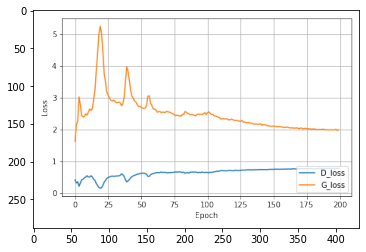

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(save_dir + 'MNIST_GAN_train_hist_no_dropout.png'))

## 2.3. save generated images

In [28]:
import os
import pickle
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm


In [29]:

class Generator(nn.Module):
    """Image generator
    
    Takes a noise vector as input and syntheses a single channel image accordingly
    """

    def __init__(self, input_dims, output_dims):
        """Init function
        
        Declare the network structure as indicated in CW2 Guidance
        
        Arguments:
            input_dims {int} -- Dimension of input noise vector
            output_dims {int} -- Dimension of the output vector (flatten image)
        """
        super(Generator, self).__init__()
        ###  TODO: Change the architecture and value as CW2 Guidance required
        
        self.fc1 = nn.Sequential(
            nn.Linear(100, 256), 
            nn.LeakyReLU(0.2)
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(256, 512), 
            nn.LeakyReLU(0.2)
        )
        
        self.fc3 = nn.Sequential(
            nn.Linear(512, 1024), 
            nn.LeakyReLU(0.2)
        )  
        
        # output hidden layer
        self.fc4 = nn.Sequential(
            nn.Linear(1024, output_dims), 
            nn.Tanh()
        )

    def forward(self, x):
        """Forward function
        
        Arguments:
            x {Tensor} -- a batch of noise vectors in shape (<batch_size>x<input_dims>)
        
        Returns:
            Tensor -- a batch of flatten image in shape (<batch_size>x<output_dims>)
        """
        ###  TODO: modify to be consistent with the network structure
        
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x


class Discriminator(nn.Module):
    """Image discriminator
    
    Takes a image as input and predict if it is real from the dataset or fake synthesised by the generator
    """

    def __init__(self, input_dims, output_dims=1):
        """Init function
        
        Declare the discriminator network structure as indicated in CW2 Guidance
        
        Arguments:
            input_dims {int} -- Dimension of the flatten input images
        
        Keyword Arguments:
            output_dims {int} -- Predicted probability (default: {1})
        """
        super(Discriminator, self).__init__()

        ###  TODO: Change the architecture and value as CW2 Guidance required

        self.fc1 = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        
        self.fc3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        
        self.fc4 = nn.Sequential(
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        """Forward function
        
        Arguments:
            x {Tensor} -- a batch of 2D image in shape (<batch_size>xHxW)
        
        Returns:
            Tensor -- predicted probabilities (<batch_size>)
        """
        ###  TODO: modify to be consistent with the network structure
        
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)

        return x



In [30]:


def show_result(G_net, z_, num_epoch, show=False, save=False, path='result.png'):
    """Result visualisation
    
    Show and save the generated figures in the grid fashion
    
    Arguments:
        G_net {[nn.Module]} -- The generator instant
        z_ {[Tensor]} -- Input noise vectors
        num_epoch {[int]} -- Indicate how many epoch has the generator been trained
    
    Keyword Arguments:
        show {bool} -- If to display the images (default: {False})
        save {bool} -- If to store the images (default: {False})
        path {str} -- path to store the images (default: {'result.png'})
    """

    ###  TODO: complete the rest of part
    # hint: use plt.subplots to construct grid
    # hint: use plt.imshow and plt.savefig to display and store the images
    
    show_data_fake = G_net(z_)
    fig, axes = plt.subplots(figsize=(7,7), nrows=5, ncols=5, sharey=True, sharex=True)
    
    for ax, img in zip(axes.flatten(), show_data_fake):
        img = img.detach().cpu().numpy()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        
    if save:
        plt.savefig(path)
    if show:
        plt.show()
    else:
        plt.close()   


def show_train_hist(hist, show=False, save=False, path='Train_hist.png'):
    """Loss tracker
    
    Plot the losses of generator and discriminator independently to see the trend
    
    Arguments:
        hist {[dict]} -- Tracking variables
    
    Keyword Arguments:
        show {bool} -- If to display the figure (default: {False})
        save {bool} -- If to store the figure (default: {False})
        path {str} -- path to store the figure (default: {'Train_hist.png'})
    """
    x = range(len(hist['D_losses']))

    y1 = hist['D_losses']
    y2 = hist['G_losses']

    plt.plot(x, y1, label='D_loss')
    plt.plot(x, y2, label='G_loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()


def create_noise(num, dim):
    """Noise constructor
    
    returns a tensor filled with random numbers from a standard normal distribution
    
    Arguments:
        num {int} -- Number of vectors
        dim {int} -- Dimension of vectors
    
    Returns:
        [Tensor] -- the generated noise vector batch
    """
    return torch.randn(num, dim)


In [31]:
if __name__ == '__main__':
    # initialise the device for training, if gpu is available, device = 'cuda', else: device = 'cpu'
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    data_dir = './MNIST_data/'
    save_dir = './MNIST_GAN_results/'
    image_save_dir = './MNIST_GAN_results/results'
    generated_images = './MNIST_GAN_results/generated images'

    # create folder if not exist
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    if not os.path.exists(image_save_dir):
        os.mkdir(image_save_dir)
    if not os.path.exists(generated_images):
        os.mkdir(generated_images)

In [32]:
    # training parameters
    batch_size = 100
    learning_rate = 0.0002
    epochs = 100

    # parameters for Models
    image_size = 28
    G_input_dim = 100
    G_output_dim = image_size * image_size
    D_input_dim = image_size * image_size
    D_output_dim = 1
    hidden_size = 32

In [33]:
    # construct the dataset and data loader
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=(0.5,), std=(0.5,))])
    train_data = datasets.MNIST(root=data_dir, train=True, transform=transform, download=True)
    train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

In [34]:

    # declare the generator and discriminator networks    
    G_net = Generator(G_input_dim, G_output_dim).to(device)
    D_net = Discriminator(D_input_dim, D_output_dim).to(device)

    # Binary Cross Entropy Loss function
    criterion = nn.BCELoss().to(device)

    # Initialise the Optimizers
    G_optimizer = torch.optim.Adam(G_net.parameters(), lr=learning_rate)
    D_optimizer = torch.optim.Adam(D_net.parameters(), lr=learning_rate)

    # tracking variables
    train_hist = {}
    train_hist['D_losses'] = []
    train_hist['G_losses'] = []
    train_hist['per_epoch_ptimes'] = []
    train_hist['total_ptime'] = []

    start_time = time.time()
    # training loop
    for epoch in range(epochs):
        G_net.train()
        D_net.train()
        Loss_G = []
        Loss_D = []
        epoch_start_time = time.time()
        for (image, _) in tqdm(train_loader):
            image = image.to(device)
            b_size = len(image)
            # creat real and fake labels
            real_label = torch.ones(b_size, 1).to(device)
            fake_label = torch.zeros(b_size, 1).to(device)

            # generate fake images 
            data_fake = G_net(create_noise(b_size, G_input_dim).to(device))
            data_real = image.view(b_size, D_input_dim)

            # --------train the discriminator network----------
            # compute the loss for real and fake images
            output_real = D_net(data_real)
            output_fake = D_net(data_fake)
            loss_real = criterion(output_real, real_label)
            loss_fake = criterion(output_fake, fake_label)
            loss_d = loss_real + loss_fake

            # back propagation
            D_optimizer.zero_grad()
            loss_d.backward()
            D_optimizer.step()

            # -------- train the generator network-----------
            data_fake = G_net(create_noise(b_size, G_input_dim).to(device))

            # compute the loss for generator network
            output_fake = D_net(data_fake)
            loss_g = criterion(output_fake, real_label)

            ## back propagation
            G_optimizer.zero_grad()
            loss_g.backward()
            G_optimizer.step()

            ## store the loss of each iter
            Loss_D.append(loss_d.item())
            Loss_G.append(loss_g.item())

        epoch_loss_g = np.mean(Loss_G)  # mean generator loss for the epoch
        epoch_loss_d = np.mean(Loss_D)  # mean discriminator loss for the epoch
        epoch_end_time = time.time()
        per_epoch_ptime = epoch_end_time - epoch_start_time

        print("Epoch %d of %d with %.2f s" % (epoch + 1, epochs, per_epoch_ptime))
        print("Generator loss: %.8f, Discriminator loss: %.8f" % (epoch_loss_g, epoch_loss_d))

        #show opoch  10, 20, 50, and 100      
        if epoch == 9 or epoch == 19 or epoch == 49 or epoch == 99:
            path = image_save_dir + '/MNIST_GAN_' + str(epoch + 1) + '.png'
            show_result(G_net, create_noise(25, 100).to(device), (epoch + 1), save=True, path=path)

        # record the loss for every epoch
        train_hist['G_losses'].append(epoch_loss_g)
        train_hist['D_losses'].append(epoch_loss_d)
        train_hist['per_epoch_ptimes'].append(per_epoch_ptime)

    end_time = time.time()
    total_ptime = end_time - start_time
    train_hist['total_ptime'].append(total_ptime)

    print('Avg per epoch ptime: %.2f, total %d epochs ptime: %.2f' % (
        np.mean(train_hist['per_epoch_ptimes']), epochs, total_ptime))
    print("Training finish!... save training results")
    with open(save_dir + '/train_hist.pkl', 'wb') as f:
        pickle.dump(train_hist, f)

  0%|          | 3/600 [00:00<00:29, 20.46it/s]

Epoch 1 of 100 with 29.95 s
Generator loss: 2.99719042, Discriminator loss: 0.90369057


  0%|          | 3/600 [00:00<00:25, 23.50it/s]

Epoch 2 of 100 with 23.75 s
Generator loss: 1.32923206, Discriminator loss: 1.15344144


  0%|          | 3/600 [00:00<00:28, 20.89it/s]

Epoch 3 of 100 with 23.45 s
Generator loss: 2.90519037, Discriminator loss: 0.65152714


  0%|          | 3/600 [00:00<00:25, 23.69it/s]

Epoch 4 of 100 with 23.51 s
Generator loss: 3.53629850, Discriminator loss: 0.49615527


  0%|          | 3/600 [00:00<00:28, 20.60it/s]

Epoch 5 of 100 with 23.38 s
Generator loss: 3.23090317, Discriminator loss: 0.50810241


  0%|          | 3/600 [00:00<00:25, 23.50it/s]

Epoch 6 of 100 with 23.63 s
Generator loss: 3.29940361, Discriminator loss: 0.42311899


  0%|          | 3/600 [00:00<00:25, 23.32it/s]

Epoch 7 of 100 with 23.29 s
Generator loss: 3.11449499, Discriminator loss: 0.47678396


  0%|          | 3/600 [00:00<00:26, 22.28it/s]

Epoch 8 of 100 with 23.43 s
Generator loss: 2.82137337, Discriminator loss: 0.54895035


  0%|          | 3/600 [00:00<00:26, 22.12it/s]

Epoch 9 of 100 with 23.38 s
Generator loss: 2.61542173, Discriminator loss: 0.56066198


100%|██████████| 600/600 [00:23<00:00, 25.68it/s]


Epoch 10 of 100 with 23.37 s
Generator loss: 2.55970754, Discriminator loss: 0.59125859


  0%|          | 2/600 [00:00<00:32, 18.40it/s]

Epoch 11 of 100 with 23.90 s
Generator loss: 2.38927067, Discriminator loss: 0.62321055


  0%|          | 3/600 [00:00<00:27, 21.96it/s]

Epoch 12 of 100 with 24.66 s
Generator loss: 2.16255846, Discriminator loss: 0.69655166


  0%|          | 2/600 [00:00<00:31, 18.75it/s]

Epoch 13 of 100 with 24.12 s
Generator loss: 1.96835239, Discriminator loss: 0.77376449


  0%|          | 3/600 [00:00<00:27, 21.80it/s]

Epoch 14 of 100 with 24.01 s
Generator loss: 2.04041828, Discriminator loss: 0.72700749


  0%|          | 3/600 [00:00<00:26, 22.28it/s]

Epoch 15 of 100 with 23.51 s
Generator loss: 1.99538469, Discriminator loss: 0.74341632


  0%|          | 2/600 [00:00<00:35, 16.99it/s]

Epoch 16 of 100 with 26.01 s
Generator loss: 1.87520970, Discriminator loss: 0.81323747


  0%|          | 3/600 [00:00<00:27, 21.49it/s]

Epoch 17 of 100 with 25.43 s
Generator loss: 1.96125827, Discriminator loss: 0.78480244


  0%|          | 2/600 [00:00<00:31, 19.10it/s]

Epoch 18 of 100 with 24.17 s
Generator loss: 1.93138377, Discriminator loss: 0.77360192


  0%|          | 2/600 [00:00<00:36, 16.44it/s]

Epoch 19 of 100 with 26.37 s
Generator loss: 1.81152754, Discriminator loss: 0.82834274


100%|██████████| 600/600 [00:26<00:00, 22.77it/s]


Epoch 20 of 100 with 26.36 s
Generator loss: 1.72314149, Discriminator loss: 0.87606085


  0%|          | 3/600 [00:00<00:25, 23.69it/s]

Epoch 21 of 100 with 25.28 s
Generator loss: 1.75304068, Discriminator loss: 0.85135393


  0%|          | 2/600 [00:00<00:33, 17.59it/s]

Epoch 22 of 100 with 25.96 s
Generator loss: 1.63404619, Discriminator loss: 0.89489782


  0%|          | 2/600 [00:00<00:32, 18.23it/s]

Epoch 23 of 100 with 26.54 s
Generator loss: 1.65749866, Discriminator loss: 0.89907041


  0%|          | 2/600 [00:00<00:32, 18.57it/s]

Epoch 24 of 100 with 26.68 s
Generator loss: 1.57507257, Discriminator loss: 0.93376652


  0%|          | 3/600 [00:00<00:27, 21.49it/s]

Epoch 25 of 100 with 25.14 s
Generator loss: 1.53247580, Discriminator loss: 0.94627594


  0%|          | 3/600 [00:00<00:26, 22.45it/s]

Epoch 26 of 100 with 23.33 s
Generator loss: 1.55663395, Discriminator loss: 0.93493463


  0%|          | 3/600 [00:00<00:24, 24.67it/s]

Epoch 27 of 100 with 22.95 s
Generator loss: 1.51791221, Discriminator loss: 0.95321291


  0%|          | 3/600 [00:00<00:28, 21.04it/s]

Epoch 28 of 100 with 22.98 s
Generator loss: 1.53334209, Discriminator loss: 0.94929490


  0%|          | 3/600 [00:00<00:27, 21.49it/s]

Epoch 29 of 100 with 23.23 s
Generator loss: 1.51359052, Discriminator loss: 0.95595947


  0%|          | 3/600 [00:00<00:27, 21.64it/s]

Epoch 30 of 100 with 22.95 s
Generator loss: 1.40513404, Discriminator loss: 0.98549752


  0%|          | 3/600 [00:00<00:27, 21.64it/s]

Epoch 31 of 100 with 22.81 s
Generator loss: 1.33312597, Discriminator loss: 1.02972869


  0%|          | 3/600 [00:00<00:24, 24.86it/s]

Epoch 32 of 100 with 22.75 s
Generator loss: 1.33889120, Discriminator loss: 1.03100505


  0%|          | 3/600 [00:00<00:24, 24.06it/s]

Epoch 33 of 100 with 23.28 s
Generator loss: 1.33570580, Discriminator loss: 1.03717326


  0%|          | 3/600 [00:00<00:27, 21.64it/s]

Epoch 34 of 100 with 23.58 s
Generator loss: 1.31097776, Discriminator loss: 1.04650129


  0%|          | 3/600 [00:00<00:24, 24.26it/s]

Epoch 35 of 100 with 23.36 s
Generator loss: 1.29126405, Discriminator loss: 1.06126188


  0%|          | 2/600 [00:00<00:30, 19.66it/s]

Epoch 36 of 100 with 23.16 s
Generator loss: 1.25942543, Discriminator loss: 1.06867240


  0%|          | 3/600 [00:00<00:25, 23.69it/s]

Epoch 37 of 100 with 23.26 s
Generator loss: 1.22623755, Discriminator loss: 1.08937505


  0%|          | 3/600 [00:00<00:27, 21.96it/s]

Epoch 38 of 100 with 23.20 s
Generator loss: 1.22570504, Discriminator loss: 1.09099759


  0%|          | 3/600 [00:00<00:24, 24.06it/s]

Epoch 39 of 100 with 23.25 s
Generator loss: 1.21278742, Discriminator loss: 1.10198965


  0%|          | 3/600 [00:00<00:25, 23.88it/s]

Epoch 40 of 100 with 23.14 s
Generator loss: 1.20100485, Discriminator loss: 1.10156273


  0%|          | 2/600 [00:00<00:30, 19.86it/s]

Epoch 41 of 100 with 23.32 s
Generator loss: 1.19577229, Discriminator loss: 1.09866476


  0%|          | 3/600 [00:00<00:24, 24.06it/s]

Epoch 42 of 100 with 23.75 s
Generator loss: 1.19358841, Discriminator loss: 1.10489915


  0%|          | 3/600 [00:00<00:27, 21.80it/s]

Epoch 43 of 100 with 23.26 s
Generator loss: 1.18501090, Discriminator loss: 1.11343660


  0%|          | 3/600 [00:00<00:28, 21.18it/s]

Epoch 44 of 100 with 23.30 s
Generator loss: 1.14112645, Discriminator loss: 1.13088593


  0%|          | 3/600 [00:00<00:25, 22.97it/s]

Epoch 45 of 100 with 23.26 s
Generator loss: 1.13236842, Discriminator loss: 1.14507559


  0%|          | 3/600 [00:00<00:26, 22.62it/s]

Epoch 46 of 100 with 23.31 s
Generator loss: 1.16216963, Discriminator loss: 1.12474386


  0%|          | 3/600 [00:00<00:26, 22.45it/s]

Epoch 47 of 100 with 23.25 s
Generator loss: 1.10398309, Discriminator loss: 1.15319762


  0%|          | 3/600 [00:00<00:25, 23.32it/s]

Epoch 48 of 100 with 23.19 s
Generator loss: 1.08171801, Discriminator loss: 1.16441794


  0%|          | 3/600 [00:00<00:25, 23.32it/s]

Epoch 49 of 100 with 23.27 s
Generator loss: 1.09972445, Discriminator loss: 1.16007832


100%|██████████| 600/600 [00:23<00:00, 25.77it/s]


Epoch 50 of 100 with 23.29 s
Generator loss: 1.11599692, Discriminator loss: 1.15451706


  0%|          | 3/600 [00:00<00:25, 23.14it/s]

Epoch 51 of 100 with 23.22 s
Generator loss: 1.07265895, Discriminator loss: 1.16482269


  0%|          | 3/600 [00:00<00:25, 22.96it/s]

Epoch 52 of 100 with 23.21 s
Generator loss: 1.08450378, Discriminator loss: 1.16624305


  0%|          | 3/600 [00:00<00:25, 22.97it/s]

Epoch 53 of 100 with 23.28 s
Generator loss: 1.08748647, Discriminator loss: 1.16860501


  0%|          | 3/600 [00:00<00:26, 22.62it/s]

Epoch 54 of 100 with 23.35 s
Generator loss: 1.08128583, Discriminator loss: 1.16945039


  0%|          | 3/600 [00:00<00:23, 25.29it/s]

Epoch 55 of 100 with 23.23 s
Generator loss: 1.08579279, Discriminator loss: 1.16778700


  0%|          | 3/600 [00:00<00:26, 22.62it/s]

Epoch 56 of 100 with 23.21 s
Generator loss: 1.06668998, Discriminator loss: 1.17436042


  0%|          | 3/600 [00:00<00:25, 23.87it/s]

Epoch 57 of 100 with 23.30 s
Generator loss: 1.04904943, Discriminator loss: 1.17896422


  0%|          | 2/600 [00:00<00:30, 19.86it/s]

Epoch 58 of 100 with 23.31 s
Generator loss: 1.04583956, Discriminator loss: 1.19031592


  0%|          | 3/600 [00:00<00:27, 21.49it/s]

Epoch 59 of 100 with 23.27 s
Generator loss: 1.06776415, Discriminator loss: 1.17691399


  0%|          | 3/600 [00:00<00:26, 22.62it/s]

Epoch 60 of 100 with 23.18 s
Generator loss: 1.02950274, Discriminator loss: 1.19521794


  0%|          | 3/600 [00:00<00:28, 20.89it/s]

Epoch 61 of 100 with 23.28 s
Generator loss: 1.01439036, Discriminator loss: 1.20231931


  0%|          | 3/600 [00:00<00:25, 22.97it/s]

Epoch 62 of 100 with 23.17 s
Generator loss: 1.03249188, Discriminator loss: 1.19538092


  0%|          | 3/600 [00:00<00:24, 24.06it/s]

Epoch 63 of 100 with 23.20 s
Generator loss: 1.02918619, Discriminator loss: 1.19879159


  0%|          | 3/600 [00:00<00:26, 22.45it/s]

Epoch 64 of 100 with 23.23 s
Generator loss: 1.02001874, Discriminator loss: 1.19934172


  0%|          | 2/600 [00:00<00:30, 19.67it/s]

Epoch 65 of 100 with 23.28 s
Generator loss: 1.01991181, Discriminator loss: 1.20058733


  0%|          | 3/600 [00:00<00:25, 22.97it/s]

Epoch 66 of 100 with 23.27 s
Generator loss: 1.02293775, Discriminator loss: 1.20033463


  0%|          | 3/600 [00:00<00:26, 22.45it/s]

Epoch 67 of 100 with 23.26 s
Generator loss: 1.02578253, Discriminator loss: 1.19820065


  0%|          | 3/600 [00:00<00:26, 22.28it/s]

Epoch 68 of 100 with 23.17 s
Generator loss: 1.01528222, Discriminator loss: 1.20696667


  0%|          | 3/600 [00:00<00:26, 22.12it/s]

Epoch 69 of 100 with 22.73 s
Generator loss: 0.99088751, Discriminator loss: 1.21872559


  0%|          | 3/600 [00:00<00:24, 24.66it/s]

Epoch 70 of 100 with 22.83 s
Generator loss: 0.98933849, Discriminator loss: 1.21676178


  0%|          | 3/600 [00:00<00:25, 22.96it/s]

Epoch 71 of 100 with 22.90 s
Generator loss: 0.99105697, Discriminator loss: 1.22563616


  0%|          | 3/600 [00:00<00:26, 22.62it/s]

Epoch 72 of 100 with 22.74 s
Generator loss: 0.97257800, Discriminator loss: 1.22410787


  0%|          | 3/600 [00:00<00:26, 22.78it/s]

Epoch 73 of 100 with 22.73 s
Generator loss: 0.97427615, Discriminator loss: 1.22998535


  0%|          | 3/600 [00:00<00:25, 23.69it/s]

Epoch 74 of 100 with 22.81 s
Generator loss: 0.99235636, Discriminator loss: 1.22014911


  0%|          | 3/600 [00:00<00:25, 23.32it/s]

Epoch 75 of 100 with 22.86 s
Generator loss: 0.96530835, Discriminator loss: 1.23149520


  0%|          | 3/600 [00:00<00:27, 21.33it/s]

Epoch 76 of 100 with 22.85 s
Generator loss: 0.97061414, Discriminator loss: 1.23026807


  0%|          | 3/600 [00:00<00:25, 23.14it/s]

Epoch 77 of 100 with 22.85 s
Generator loss: 0.97727998, Discriminator loss: 1.22742447


  0%|          | 3/600 [00:00<00:25, 23.88it/s]

Epoch 78 of 100 with 22.70 s
Generator loss: 0.98193616, Discriminator loss: 1.22004466


  0%|          | 3/600 [00:00<00:26, 22.62it/s]

Epoch 79 of 100 with 22.82 s
Generator loss: 0.95010794, Discriminator loss: 1.24158869


  0%|          | 3/600 [00:00<00:25, 23.51it/s]

Epoch 80 of 100 with 22.70 s
Generator loss: 0.96679981, Discriminator loss: 1.23391522


  0%|          | 3/600 [00:00<00:24, 24.87it/s]

Epoch 81 of 100 with 22.70 s
Generator loss: 0.96052054, Discriminator loss: 1.23818982


  0%|          | 3/600 [00:00<00:25, 23.87it/s]

Epoch 82 of 100 with 22.82 s
Generator loss: 0.96693428, Discriminator loss: 1.23509384


  0%|          | 3/600 [00:00<00:25, 23.87it/s]

Epoch 83 of 100 with 22.91 s
Generator loss: 0.96417101, Discriminator loss: 1.23687996


  0%|          | 3/600 [00:00<00:25, 23.13it/s]

Epoch 84 of 100 with 22.88 s
Generator loss: 0.96961895, Discriminator loss: 1.23678109


  0%|          | 3/600 [00:00<00:25, 22.96it/s]

Epoch 85 of 100 with 22.80 s
Generator loss: 0.95343261, Discriminator loss: 1.24555814


  0%|          | 2/600 [00:00<00:31, 19.28it/s]

Epoch 86 of 100 with 24.04 s
Generator loss: 0.95753809, Discriminator loss: 1.24271009


  0%|          | 3/600 [00:00<00:27, 21.49it/s]

Epoch 87 of 100 with 23.69 s
Generator loss: 0.95073767, Discriminator loss: 1.24917123


  0%|          | 3/600 [00:00<00:27, 21.96it/s]

Epoch 88 of 100 with 23.58 s
Generator loss: 0.96659758, Discriminator loss: 1.23588006


  0%|          | 3/600 [00:00<00:25, 23.88it/s]

Epoch 89 of 100 with 23.48 s
Generator loss: 0.94769886, Discriminator loss: 1.24293935


  0%|          | 2/600 [00:00<00:30, 19.47it/s]

Epoch 90 of 100 with 23.40 s
Generator loss: 0.94297676, Discriminator loss: 1.24298705


  0%|          | 3/600 [00:00<00:25, 23.69it/s]

Epoch 91 of 100 with 23.80 s
Generator loss: 0.95089768, Discriminator loss: 1.24601486


  0%|          | 3/600 [00:00<00:24, 24.06it/s]

Epoch 92 of 100 with 23.40 s
Generator loss: 0.93886380, Discriminator loss: 1.24927072


  0%|          | 2/600 [00:00<00:30, 19.47it/s]

Epoch 93 of 100 with 23.47 s
Generator loss: 0.93763505, Discriminator loss: 1.24867524


  0%|          | 3/600 [00:00<00:26, 22.45it/s]

Epoch 94 of 100 with 23.38 s
Generator loss: 0.93981912, Discriminator loss: 1.25487891


  0%|          | 3/600 [00:00<00:27, 21.64it/s]

Epoch 95 of 100 with 23.47 s
Generator loss: 0.95399512, Discriminator loss: 1.24633002


  0%|          | 3/600 [00:00<00:26, 22.79it/s]

Epoch 96 of 100 with 23.43 s
Generator loss: 0.93668758, Discriminator loss: 1.25055847


  0%|          | 3/600 [00:00<00:25, 23.50it/s]

Epoch 97 of 100 with 23.71 s
Generator loss: 0.93613766, Discriminator loss: 1.24641551


  0%|          | 3/600 [00:00<00:28, 21.04it/s]

Epoch 98 of 100 with 23.36 s
Generator loss: 0.92966862, Discriminator loss: 1.24993388


  0%|          | 3/600 [00:00<00:26, 22.45it/s]

Epoch 99 of 100 with 23.41 s
Generator loss: 0.94955874, Discriminator loss: 1.24464903


100%|██████████| 600/600 [00:23<00:00, 25.60it/s]


Epoch 100 of 100 with 23.44 s
Generator loss: 0.94290974, Discriminator loss: 1.24815847
Avg per epoch ptime: 23.59, total 100 epochs ptime: 2362.22
Training finish!... save training results


In [35]:
    show_train_hist(train_hist, save=True, path=save_dir + '/MNIST_GAN_train_hist.png')

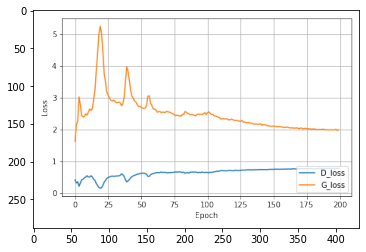

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(save_dir + 'MNIST_GAN_train_hist_no_dropout.png'))

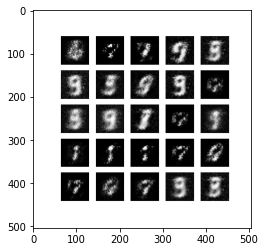

In [12]:
plt.imshow(mpimg.imread(image_save_dir + '/MNIST_GAN_10.png'))

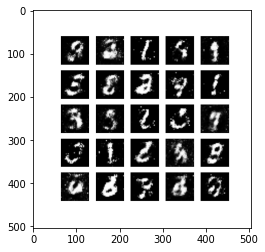

In [13]:
plt.imshow(mpimg.imread(image_save_dir + '/MNIST_GAN_20.png'))

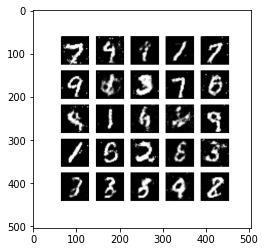

In [14]:
plt.imshow(mpimg.imread(image_save_dir + '/MNIST_GAN_50.png'))

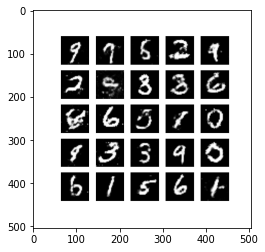

In [15]:
plt.imshow(mpimg.imread(image_save_dir + '/MNIST_GAN_100.png'))